In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_column',100)
pd.set_option('display.max_row',500)

In [2]:
# matplotlib.pyplot 한글 깨짐 방지
import platform
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    print("Hangul Setting OK for Mac")
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows":
    print("This py not setting for Window sry")
else:
    print("We don't know System")

Hangul Setting OK for Mac


In [3]:
df = pd.read_csv('./high_diamond_ranked_10min.csv')

df.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
# NULL 값 확인
df.isnull().sum().any()

False

In [6]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

### features

```
1. 'gameId' : 사용자 ID

---- 밑에 항목은 blue <-> red로 각각 데이터가 존재함. ----
2. 'blueWins' : 블루팀 승패 승 : 1, 패 : 0
3. 'blueWardsPlaced' : 와드 설치 수
4. 'blueWardsDestroyed' : 파괴된 와드 수
5. 'blueFirstBlood' : 첫 킬 획득. 성공 : 1, 실패 : 0 (한 게임 내에서 첫 번째 발생한 킬은 +100골드 추가 보상)
6. 'blueKills' : 킬 수
7. 'blueDeaths' : 데스 수
8. 'blueAssists' : 어시스트 수
9. 'blueEliteMonsters' : 엘르트 몬스터 잡은 횟수 (드래곤 + 바론)
10. 'blueDragons' : 드래곤 잡은 횟수
11. 'blueHeralds' : 전령 잡은 횟수
12. 'blueTowersDestroyed' : 부서진 타워 수
13. 'blueTotalGold' : 팀 총 골드
14. 'blueAvgLevel' : 팀 평균 레벨
15. 'blueTotalExperience' : 팀 총 경험치
16. 'blueTotalMinionsKilled' : 팀 총 미니언 킬 수
17. 'blueTotalJungleMinionsKilled' : 팀 총 정글 몬스터 킬 수
18. 'blueGoldDiff' : 골드 차이
19. 'blueExperienceDiff' : 경험치 차이
20. 'blueCSPerMin' : 분당 CS
21. 'blueGoldPerMin' : 분당 골드
```


In [7]:
# 골드 차이 격차 확인
(df['blueGoldDiff'] + df['redGoldDiff']).unique()

array([0])

## EDA

0    4949
1    4930
Name: blueWins, dtype: int64


<AxesSubplot:xlabel='blueWins', ylabel='count'>

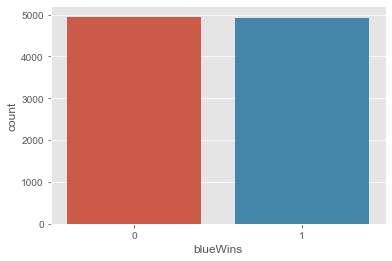

In [8]:
# 블루, 레드 wins, 0 : red Win, 1: Blue Win
print( df['blueWins'].value_counts())
sns.countplot(data=df, x='blueWins')

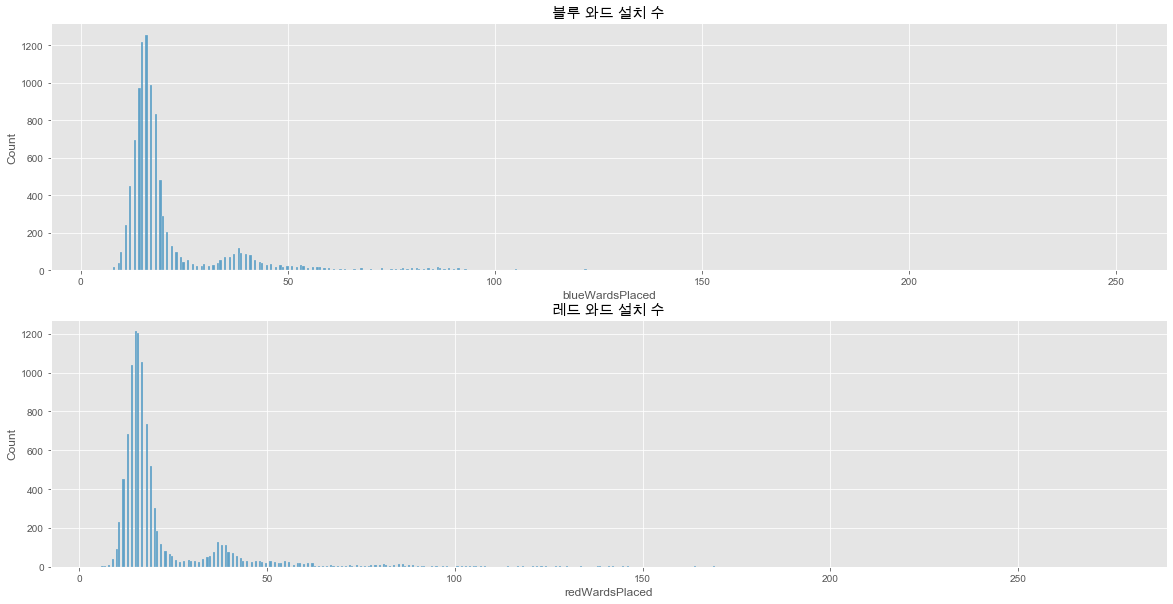

In [9]:
# 와드 설치 수
fig, ax = plt.subplots(2, figsize=(20,10))

sns.histplot(data=df['blueWardsPlaced'], ax = ax[0])
ax[0].set_title("블루 와드 설치 수")
sns.histplot(data=df['redWardsPlaced'], ax = ax[1])
ax[1].set_title("레드 와드 설치 수")
plt.show()


In [10]:
def printStatic(df, col):
    if "blue" in col:
        print("-" * 10, "Blue Team Describe" , "-" * 10)
    else:
        print("-" * 10, "Red Team Describe" , "-" * 10)

    print("{}'s Max : {}" .format(col, max(df[col])))
    print("{}'s Min : {}" .format(col, min(df[col])))   
    print("{}'s Avg : {}" .format(col, np.average(df[col]).round(2)))
    print("{}'s Median : {}" .format(col, np.median(df[col])))
    print()

In [15]:
def printHist(df, col, sample=100):

    blue_col = 'blue' + col
    red_col = 'red' + col

    if 'Diff' in col:
        
        
        x_minus = []
        x_plus = []

        random_df = df.sample(sample) # 데이터수가 약 만 개 정도로 그리는데 오래걸리고 시각화에 좋지 못해 100개 랜덤 추출하여 그래프 보여주기

        for i in random_df[blue_col]:
            if i < 0:
                x_minus.append(i)
                x_plus.append(0)
            else:
                x_minus.append(0)
                x_plus.append(i)

        plt.figure(figsize=(20,10),dpi=100)
        plt.title("{} 랜덤 100 게임" .format(col))
        plt.rcParams['axes.unicode_minus'] = False
        plt.barh(range(len(random_df)), x_plus, color='b')
        plt.barh(range(len(random_df)), x_minus, color='r')
        plt.gca().axes.yaxis.set_visible(False)

        plt.show()

        diff_avg = np.average(df[blue_col])
        team = '블루' if diff_avg > 0 else '레드'
        
        print("-" * 10, col," 평균 지표", "-" * 10)
        print("{}팀 약 {} 우세" .format(team, abs(int(diff_avg.round(0)))))
        print()
        print()
    
    else:
        fig, ax = plt.subplots(2,2, figsize=(20,10), dpi=100)

        
        lim_min = min(min(df[blue_col]), min(df[red_col]))
        lim_max = max(max(df[blue_col]), max(df[red_col]))

        lim_min = lim_min - int((abs(lim_min + lim_max))/20)
        lim_max = lim_max + int((abs(lim_min + lim_max))/20)

        sns.histplot(data=df[blue_col], ax = ax[0][0])
        ax[0][0].set_title("블루 팀 {} Hist" .format(col))
        ax[0][0].set_xlim(lim_min, lim_max)
        
        sns.histplot(data=df[red_col], ax = ax[0][1])
        ax[0][1].set_title("레드 팀 {} Count" .format(col))
        ax[0][1].set_xlim(lim_min, lim_max)


        sns.boxplot(data = df[[blue_col, red_col]], ax = ax[1][0])

        avg_blue = np.average(df[blue_col])
        avg_red = np.average(df[red_col])
        avg_sum = avg_blue + avg_red

        ratio = [100 * (avg_blue/avg_sum), 100 * (avg_red/avg_sum)]
        labels = ['BLUE', 'RED']
        ax[1][1] = plt.pie(ratio, labels=labels, autopct="%.1f%%", colors=['#4692bb','#E83828'])
        ax[1][1] = plt.title("평균 비율 비교")
        

        plt.show()

        printStatic(df, blue_col)
        printStatic(df, red_col)




In [12]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [13]:
keyword_dict = {
       '와드' : ['WardsPlaced', 'WardsDestroyed'],
       'KDA' : ['Kills', 'Deaths', 'Assists'],
       '오브젝트' : ['EliteMonsters', 'Dragons', 'Heralds'],
       '타워' : ['TowersDestroyed'],
       '골드' : ['TotalGold', 'GoldPerMin', 'TotalMinionsKilled', 'TotalJungleMinionsKilled', 'CSPerMin'],
       '경험치' : ['AvgLevel', 'TotalExperience', 'TotalJungleMinionsKilled'],
       '비교' : ['GoldDiff', 'ExperienceDiff']
}
# GoldDiff, ExperienceDiff 두 지표는 제로썸으로 따로 절대적 수치 비교가 아님

### 시각화 
- 키워드 : 와드, KDA, 오브젝트, 타워, 골드, 경험치, 비교  
** 비교 (골드, 경험치)

********** KeyWord :  와드 **********


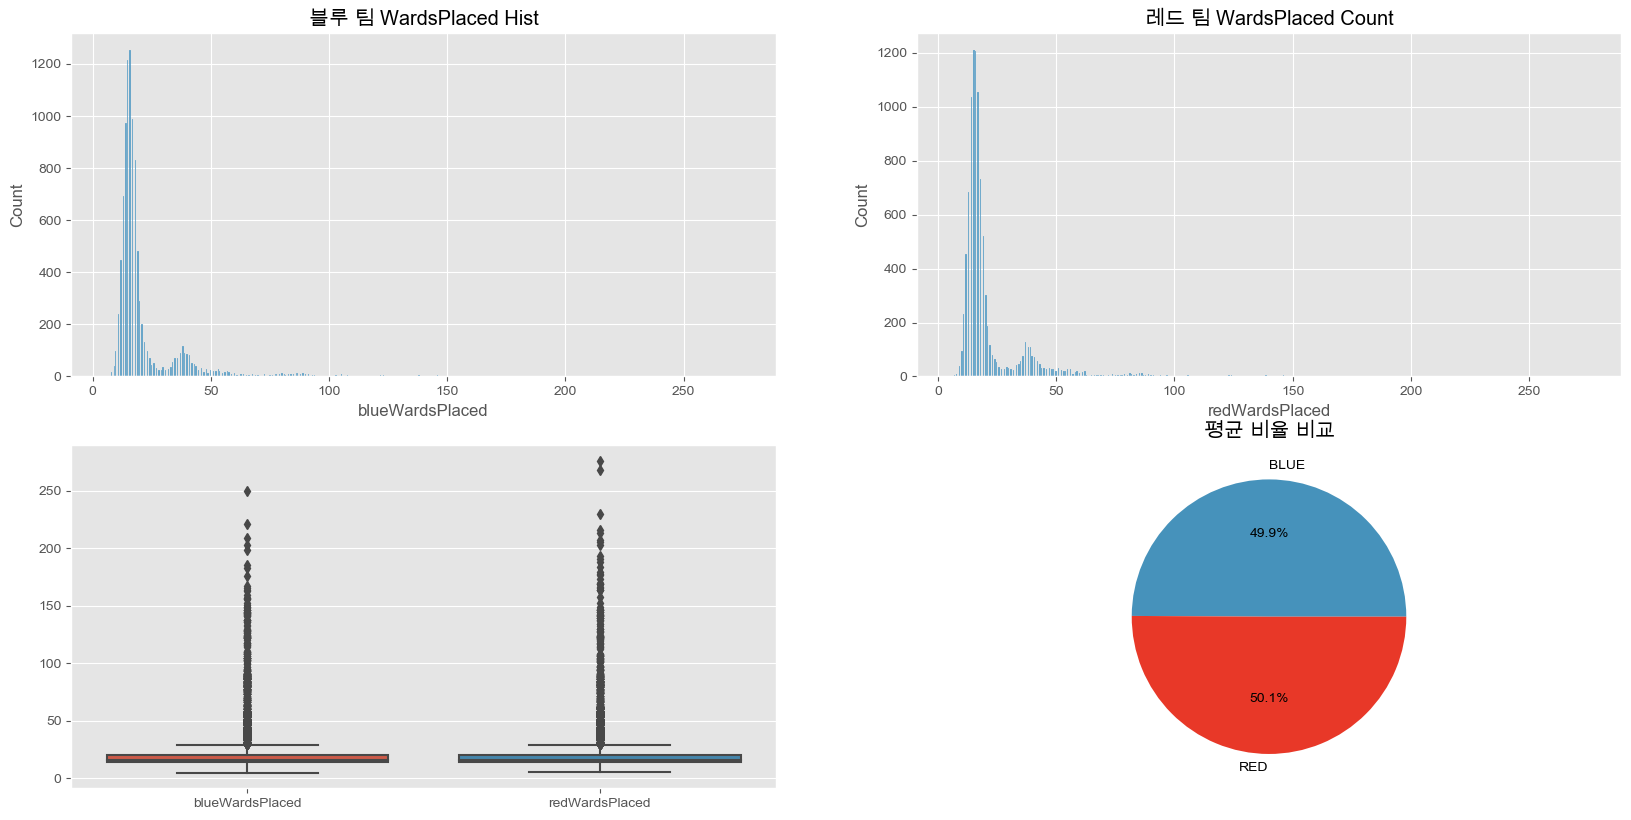

---------- Blue Team Describe ----------
blueWardsPlaced's Max : 250
blueWardsPlaced's Min : 5
blueWardsPlaced's Avg : 22.29
blueWardsPlaced's Median : 16.0

---------- Red Team Describe ----------
redWardsPlaced's Max : 276
redWardsPlaced's Min : 6
redWardsPlaced's Avg : 22.37
redWardsPlaced's Median : 16.0



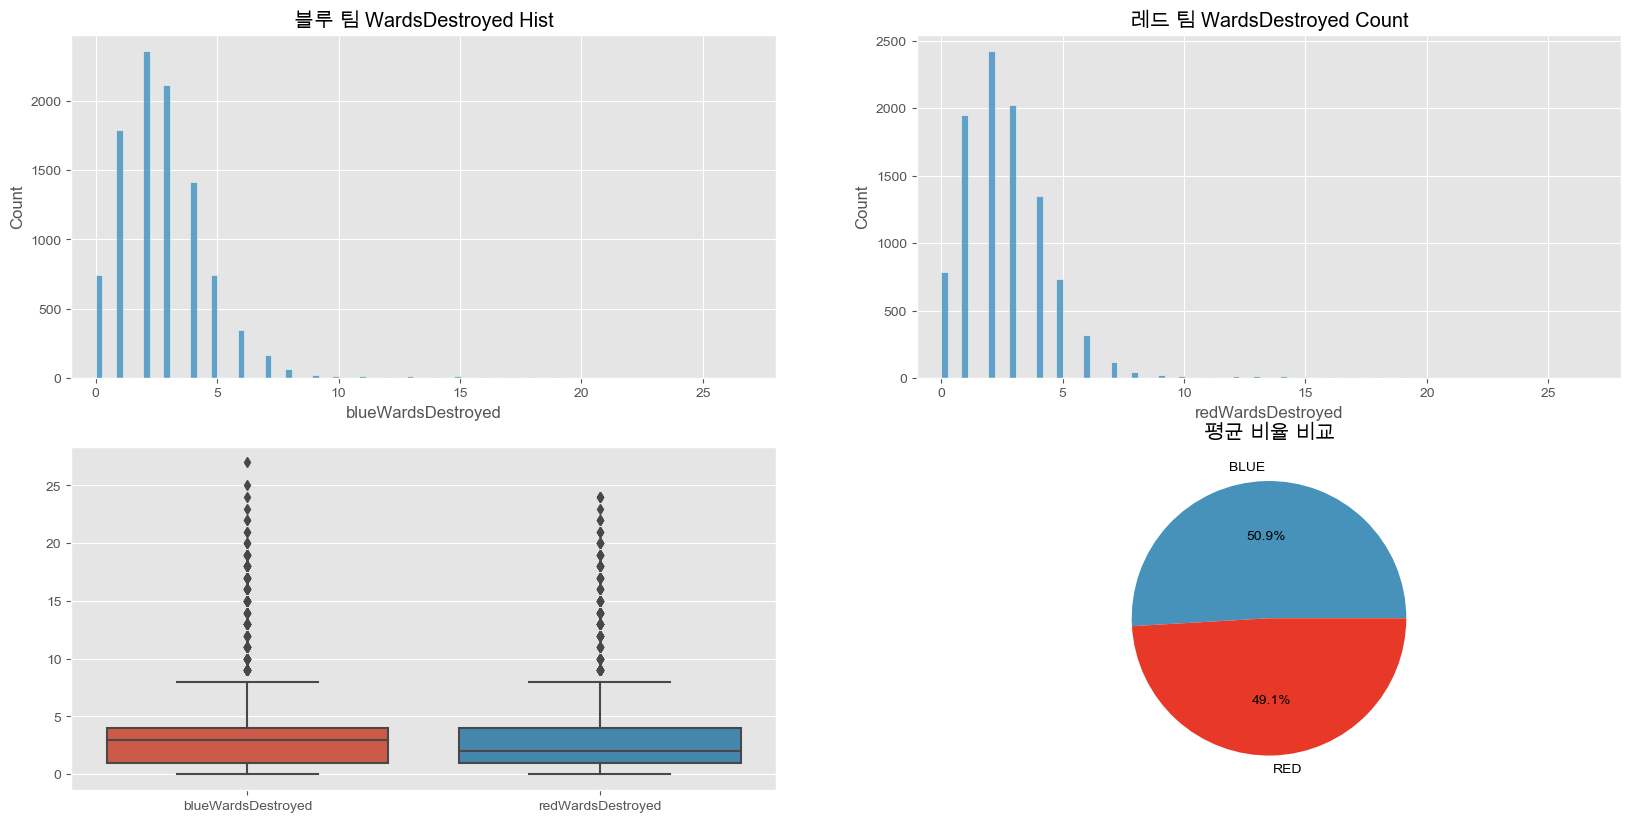

---------- Blue Team Describe ----------
blueWardsDestroyed's Max : 27
blueWardsDestroyed's Min : 0
blueWardsDestroyed's Avg : 2.82
blueWardsDestroyed's Median : 3.0

---------- Red Team Describe ----------
redWardsDestroyed's Max : 24
redWardsDestroyed's Min : 0
redWardsDestroyed's Avg : 2.72
redWardsDestroyed's Median : 2.0



********** KeyWord :  KDA **********


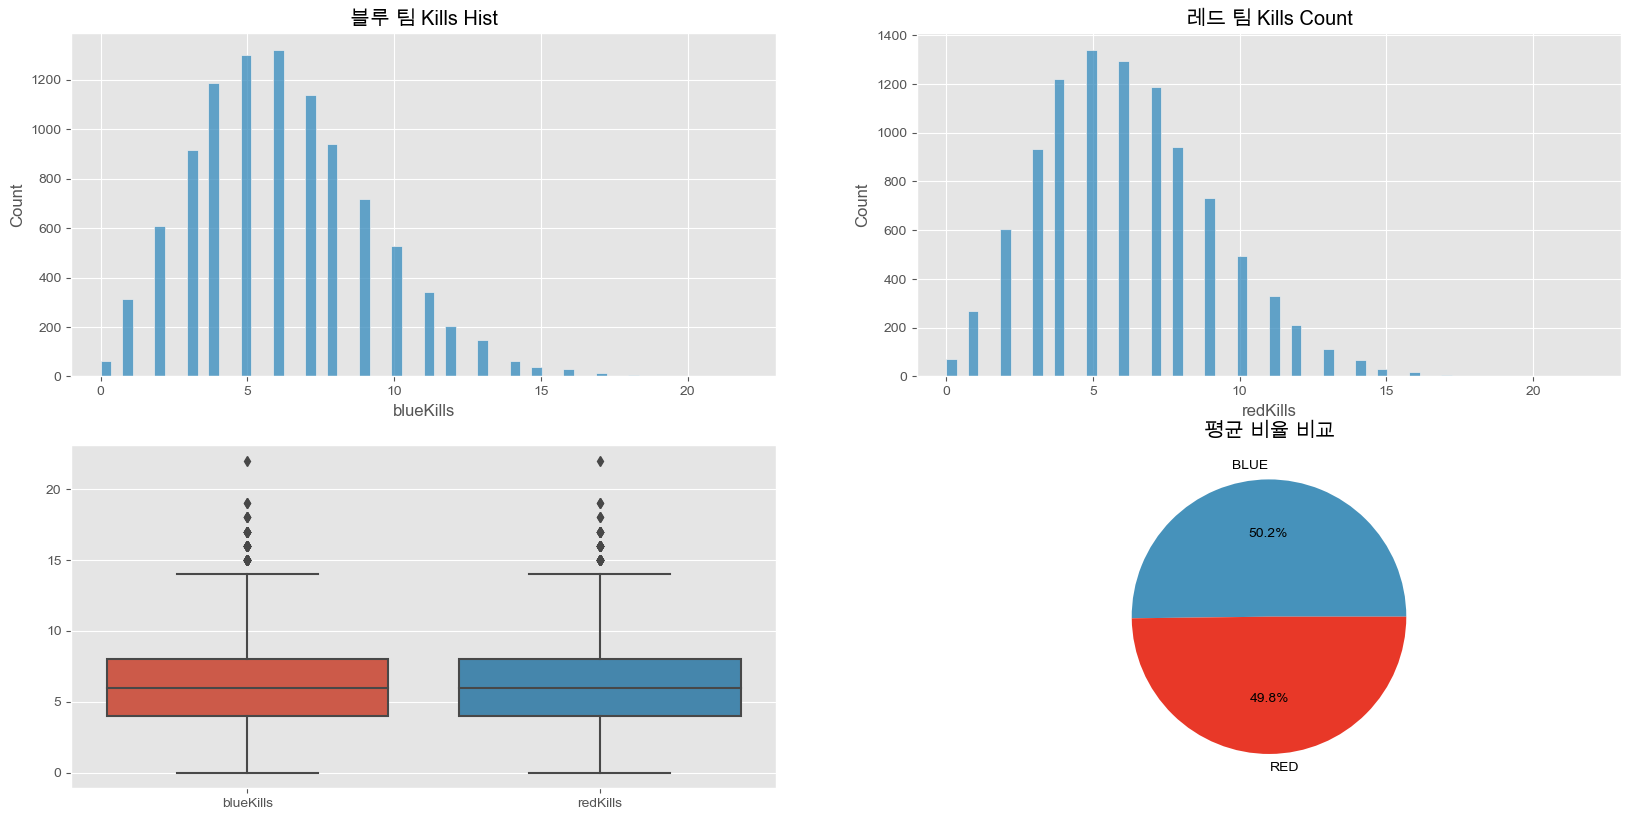

---------- Blue Team Describe ----------
blueKills's Max : 22
blueKills's Min : 0
blueKills's Avg : 6.18
blueKills's Median : 6.0

---------- Red Team Describe ----------
redKills's Max : 22
redKills's Min : 0
redKills's Avg : 6.14
redKills's Median : 6.0



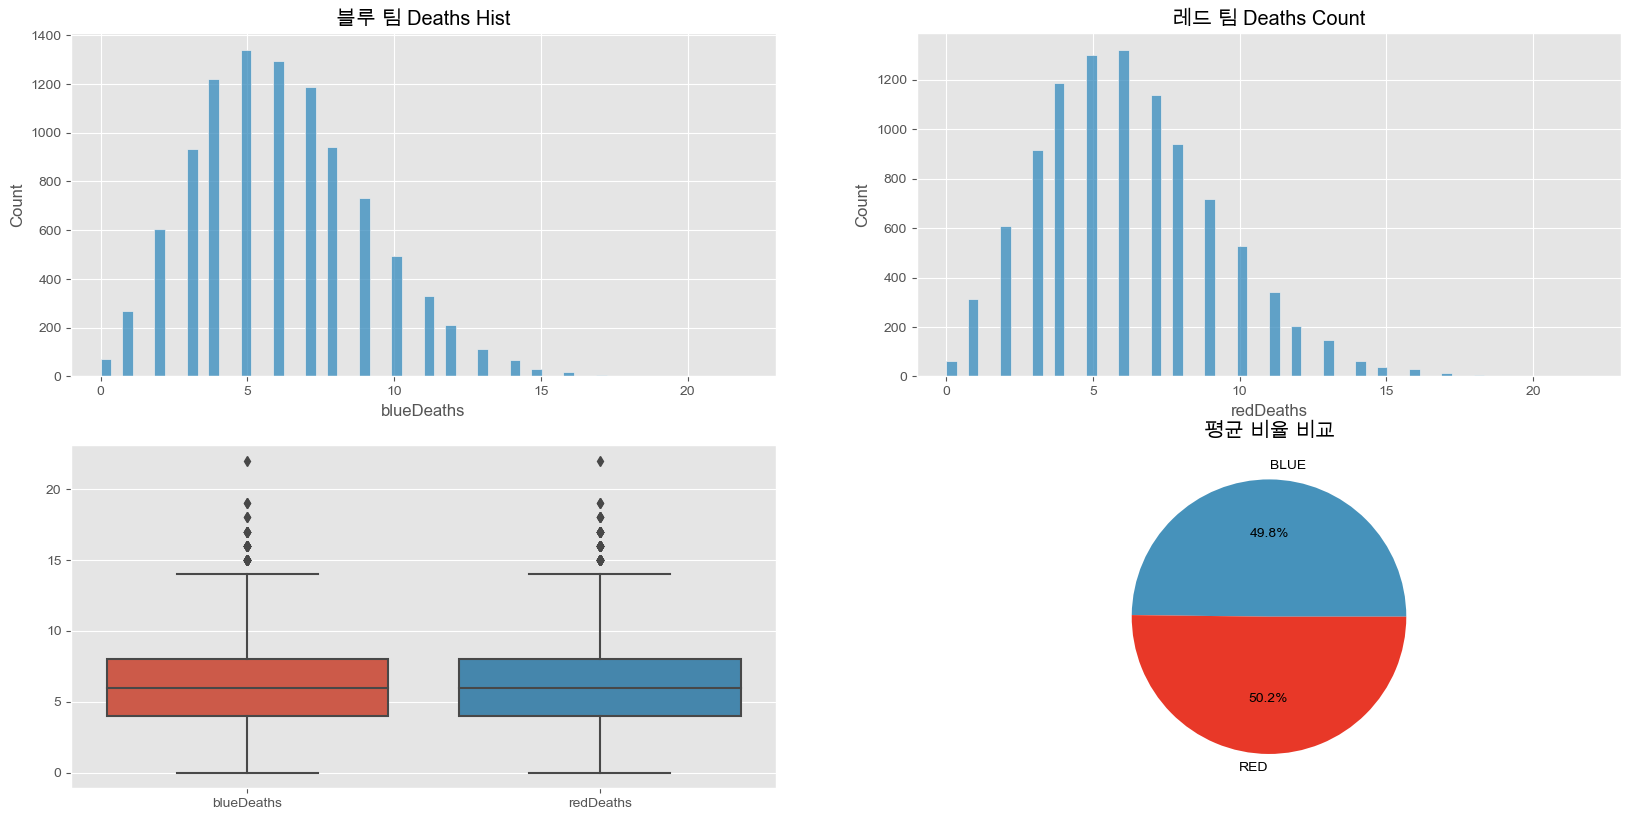

---------- Blue Team Describe ----------
blueDeaths's Max : 22
blueDeaths's Min : 0
blueDeaths's Avg : 6.14
blueDeaths's Median : 6.0

---------- Red Team Describe ----------
redDeaths's Max : 22
redDeaths's Min : 0
redDeaths's Avg : 6.18
redDeaths's Median : 6.0



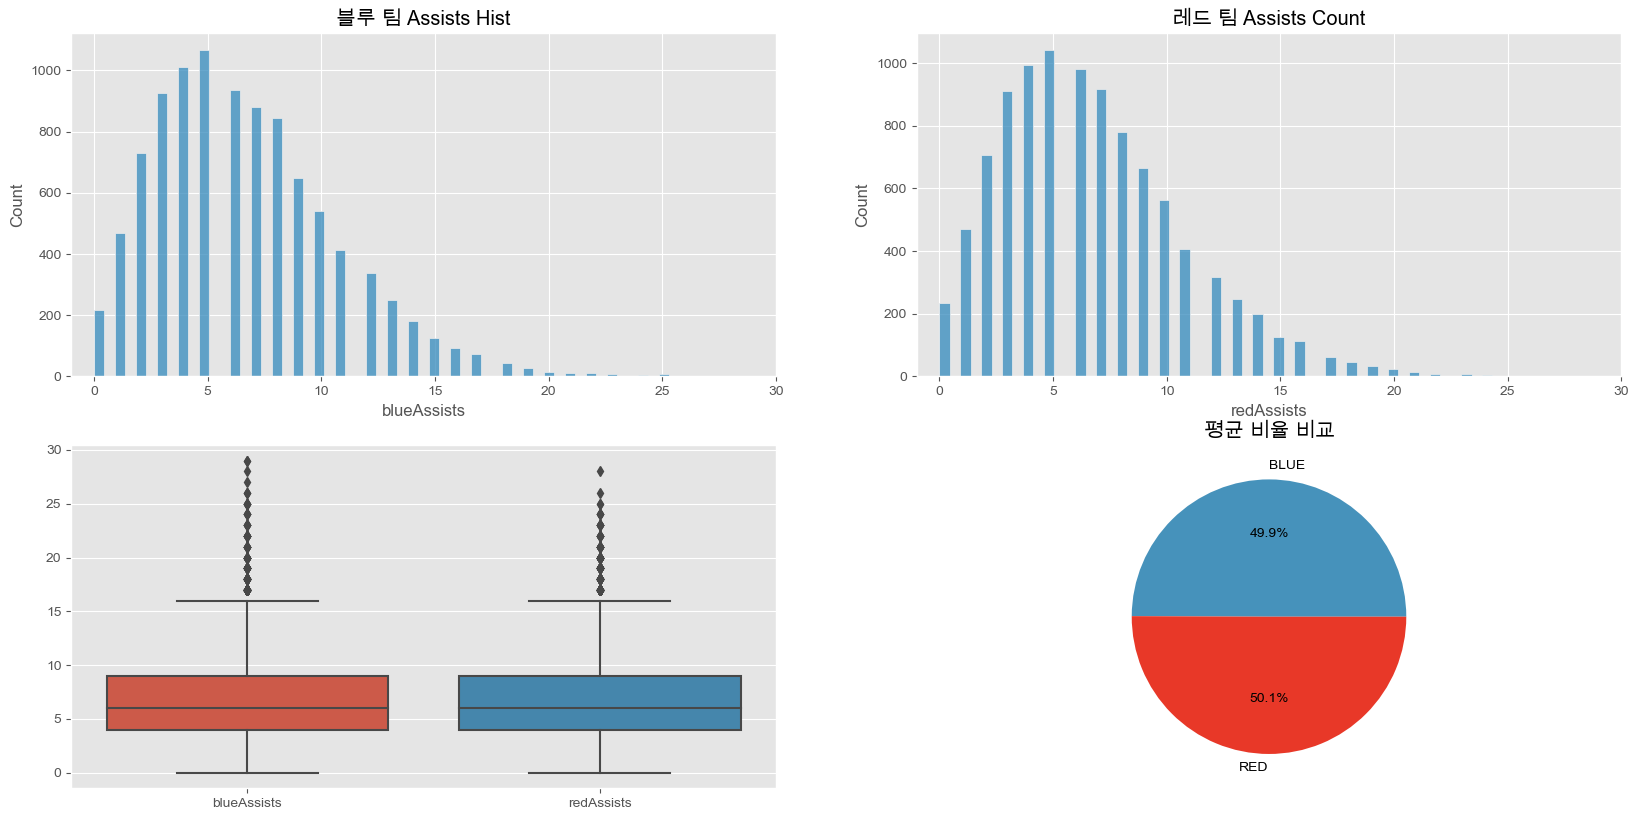

---------- Blue Team Describe ----------
blueAssists's Max : 29
blueAssists's Min : 0
blueAssists's Avg : 6.65
blueAssists's Median : 6.0

---------- Red Team Describe ----------
redAssists's Max : 28
redAssists's Min : 0
redAssists's Avg : 6.66
redAssists's Median : 6.0



********** KeyWord :  오브젝트 **********


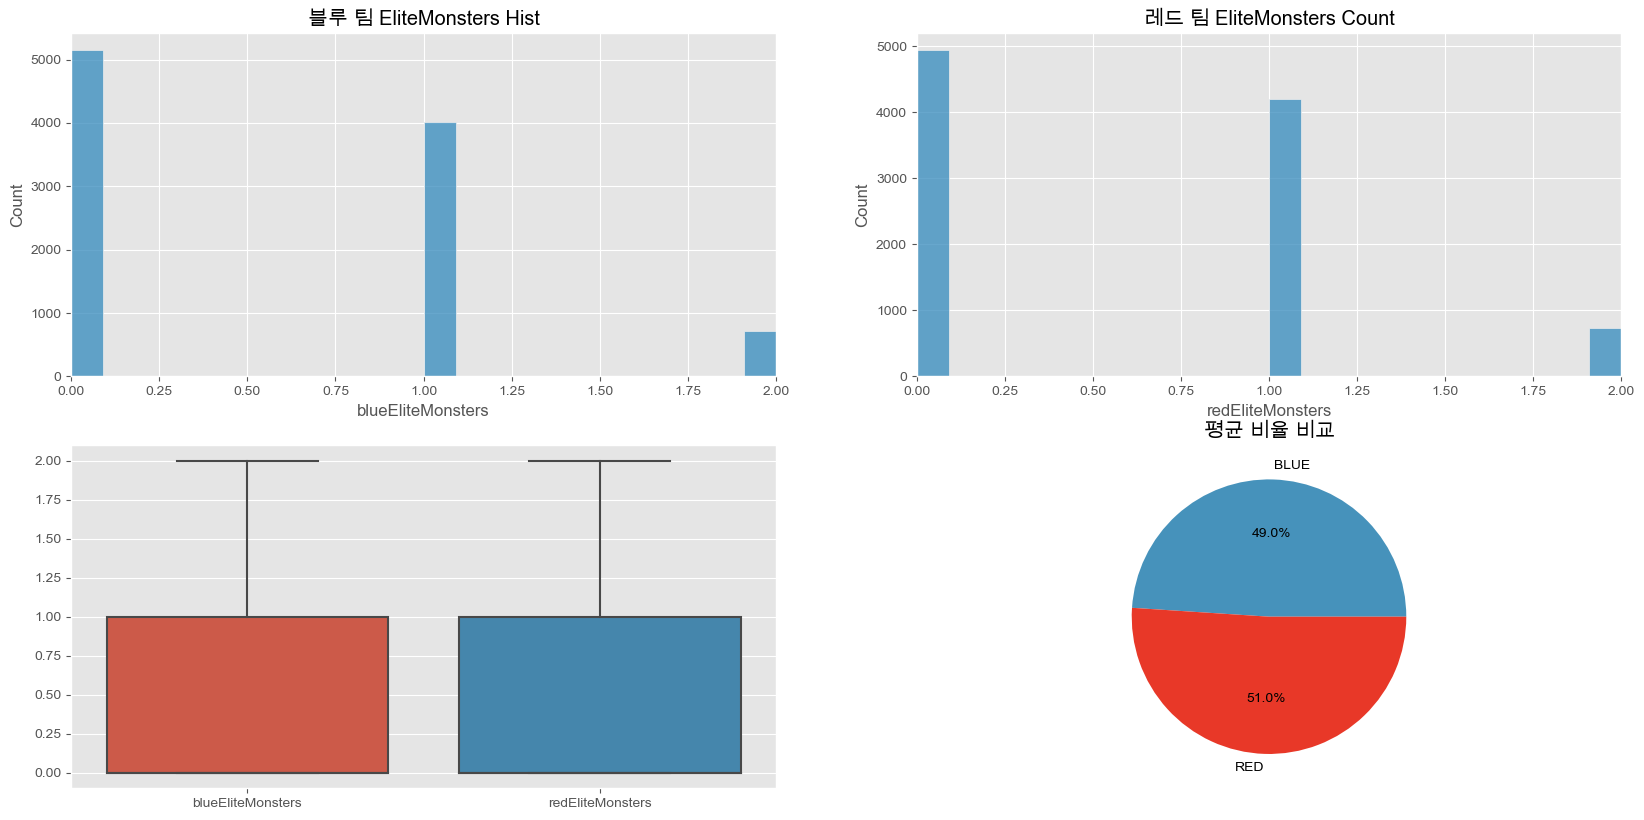

---------- Blue Team Describe ----------
blueEliteMonsters's Max : 2
blueEliteMonsters's Min : 0
blueEliteMonsters's Avg : 0.55
blueEliteMonsters's Median : 0.0

---------- Red Team Describe ----------
redEliteMonsters's Max : 2
redEliteMonsters's Min : 0
redEliteMonsters's Avg : 0.57
redEliteMonsters's Median : 0.0



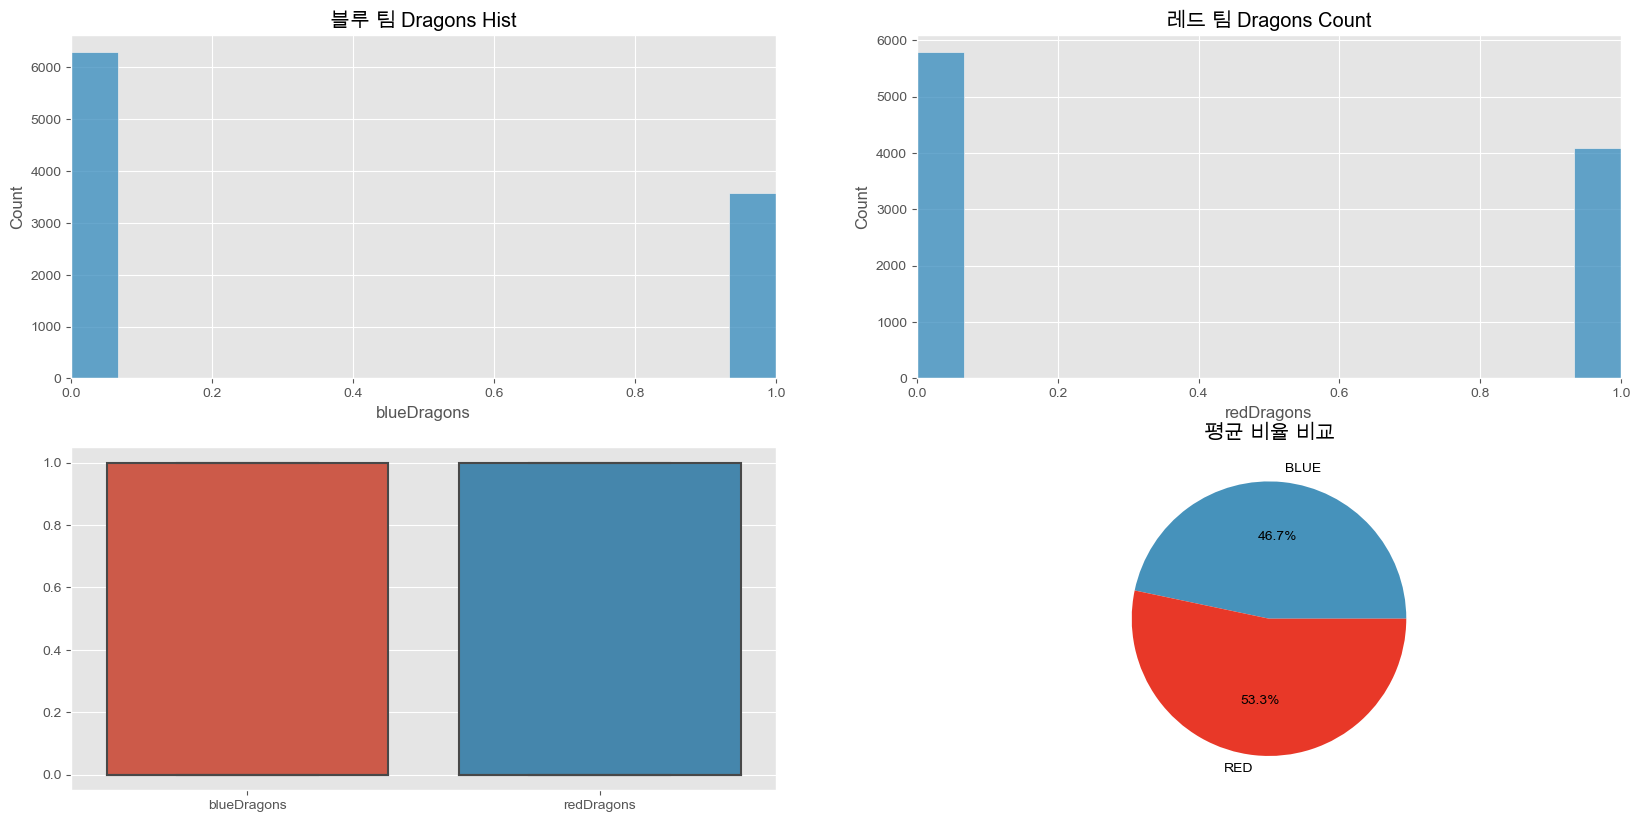

---------- Blue Team Describe ----------
blueDragons's Max : 1
blueDragons's Min : 0
blueDragons's Avg : 0.36
blueDragons's Median : 0.0

---------- Red Team Describe ----------
redDragons's Max : 1
redDragons's Min : 0
redDragons's Avg : 0.41
redDragons's Median : 0.0



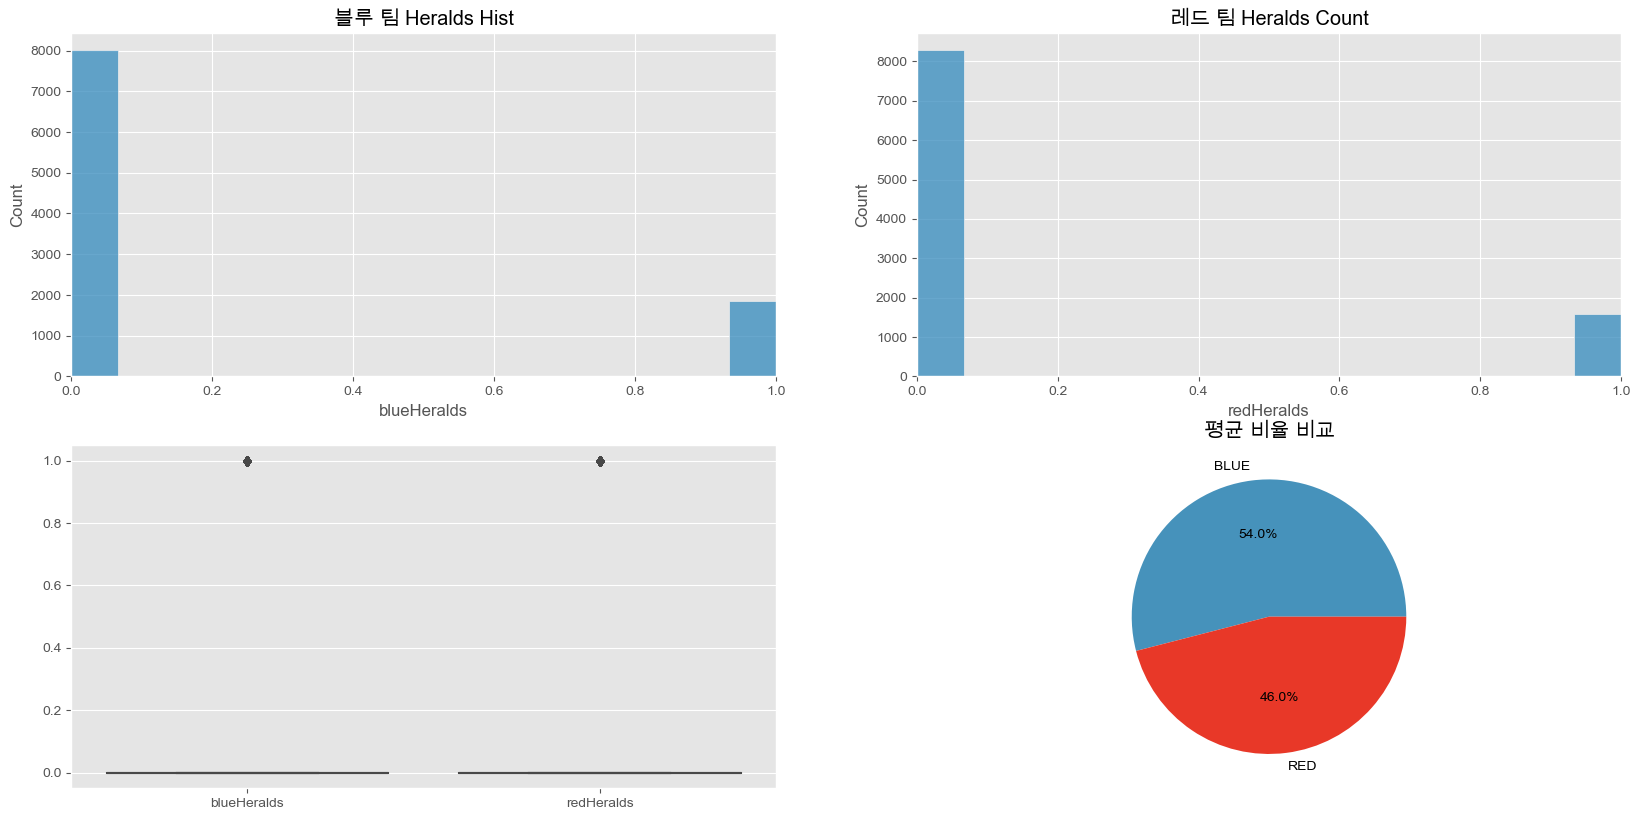

---------- Blue Team Describe ----------
blueHeralds's Max : 1
blueHeralds's Min : 0
blueHeralds's Avg : 0.19
blueHeralds's Median : 0.0

---------- Red Team Describe ----------
redHeralds's Max : 1
redHeralds's Min : 0
redHeralds's Avg : 0.16
redHeralds's Median : 0.0



********** KeyWord :  타워 **********


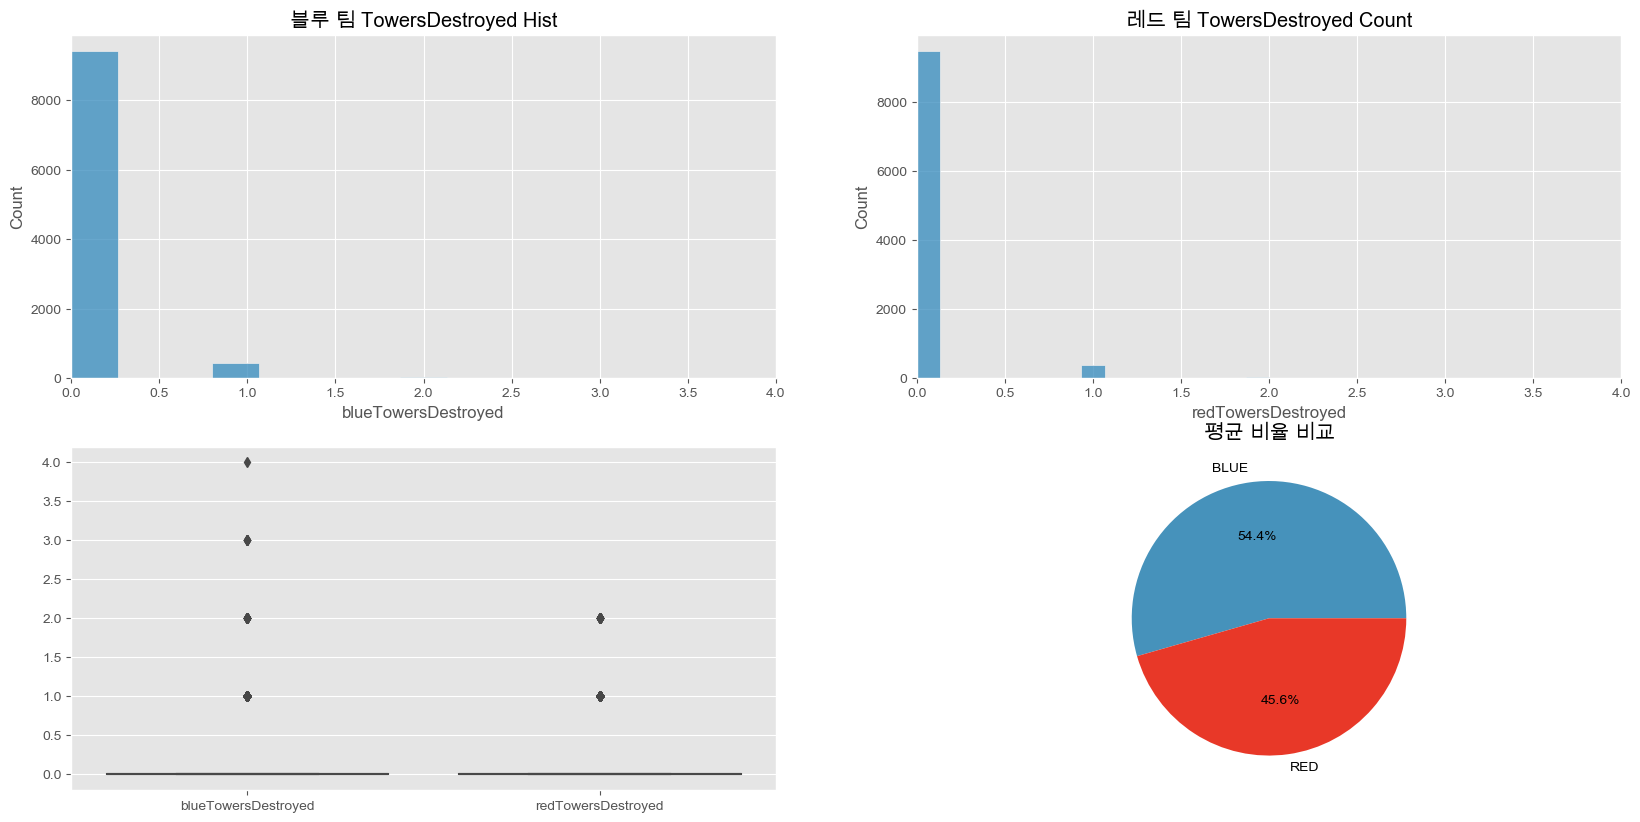

---------- Blue Team Describe ----------
blueTowersDestroyed's Max : 4
blueTowersDestroyed's Min : 0
blueTowersDestroyed's Avg : 0.05
blueTowersDestroyed's Median : 0.0

---------- Red Team Describe ----------
redTowersDestroyed's Max : 2
redTowersDestroyed's Min : 0
redTowersDestroyed's Avg : 0.04
redTowersDestroyed's Median : 0.0



********** KeyWord :  골드 **********


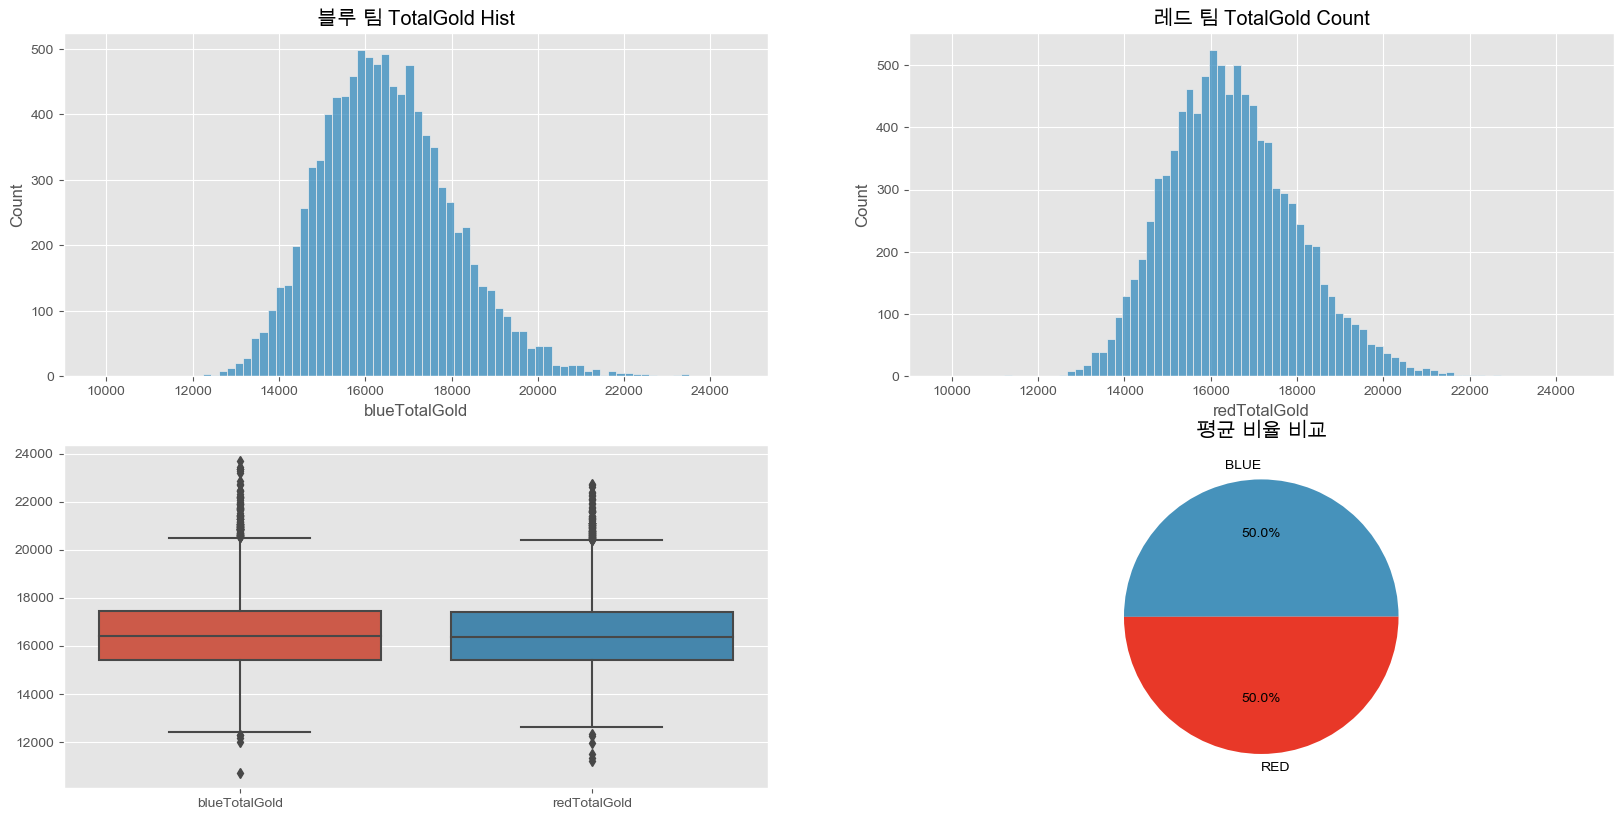

---------- Blue Team Describe ----------
blueTotalGold's Max : 23701
blueTotalGold's Min : 10730
blueTotalGold's Avg : 16503.46
blueTotalGold's Median : 16398.0

---------- Red Team Describe ----------
redTotalGold's Max : 22732
redTotalGold's Min : 11212
redTotalGold's Avg : 16489.04
redTotalGold's Median : 16378.0



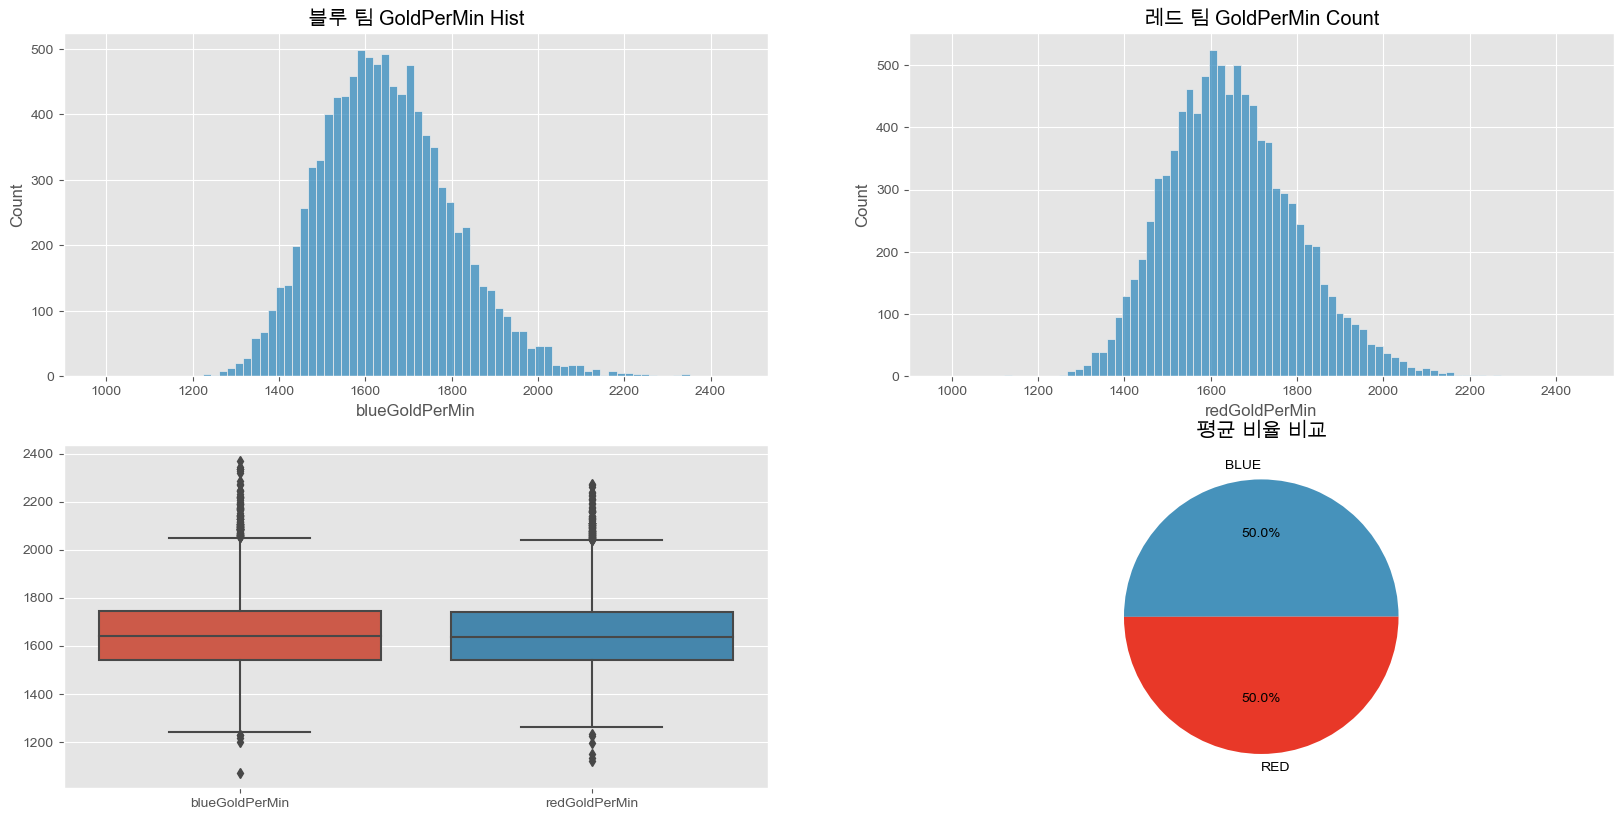

---------- Blue Team Describe ----------
blueGoldPerMin's Max : 2370.1
blueGoldPerMin's Min : 1073.0
blueGoldPerMin's Avg : 1650.35
blueGoldPerMin's Median : 1639.8

---------- Red Team Describe ----------
redGoldPerMin's Max : 2273.2
redGoldPerMin's Min : 1121.2
redGoldPerMin's Avg : 1648.9
redGoldPerMin's Median : 1637.8



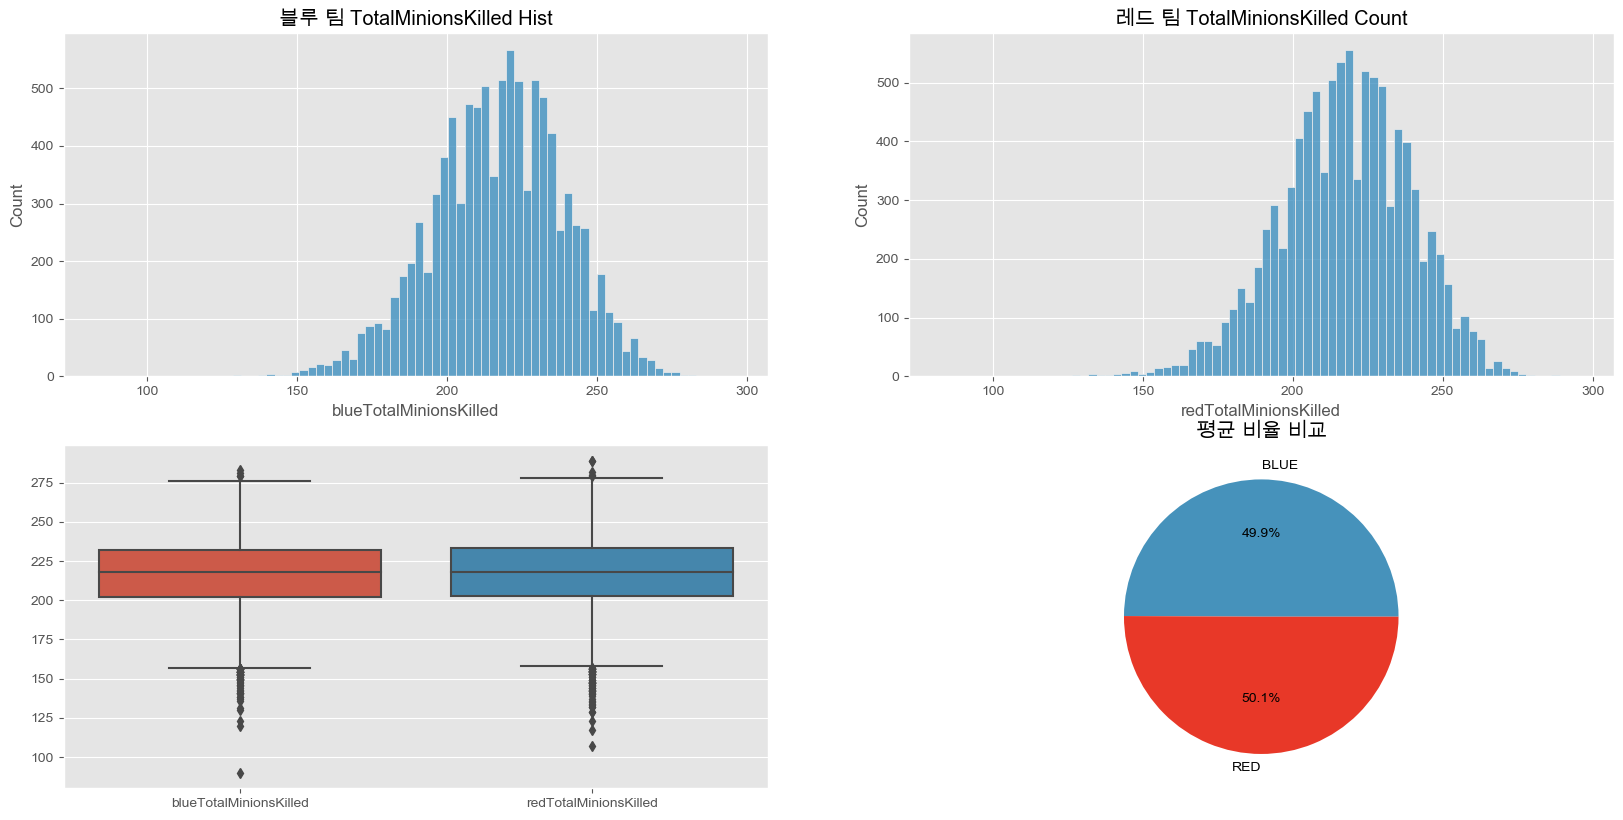

---------- Blue Team Describe ----------
blueTotalMinionsKilled's Max : 283
blueTotalMinionsKilled's Min : 90
blueTotalMinionsKilled's Avg : 216.7
blueTotalMinionsKilled's Median : 218.0

---------- Red Team Describe ----------
redTotalMinionsKilled's Max : 289
redTotalMinionsKilled's Min : 107
redTotalMinionsKilled's Avg : 217.35
redTotalMinionsKilled's Median : 218.0



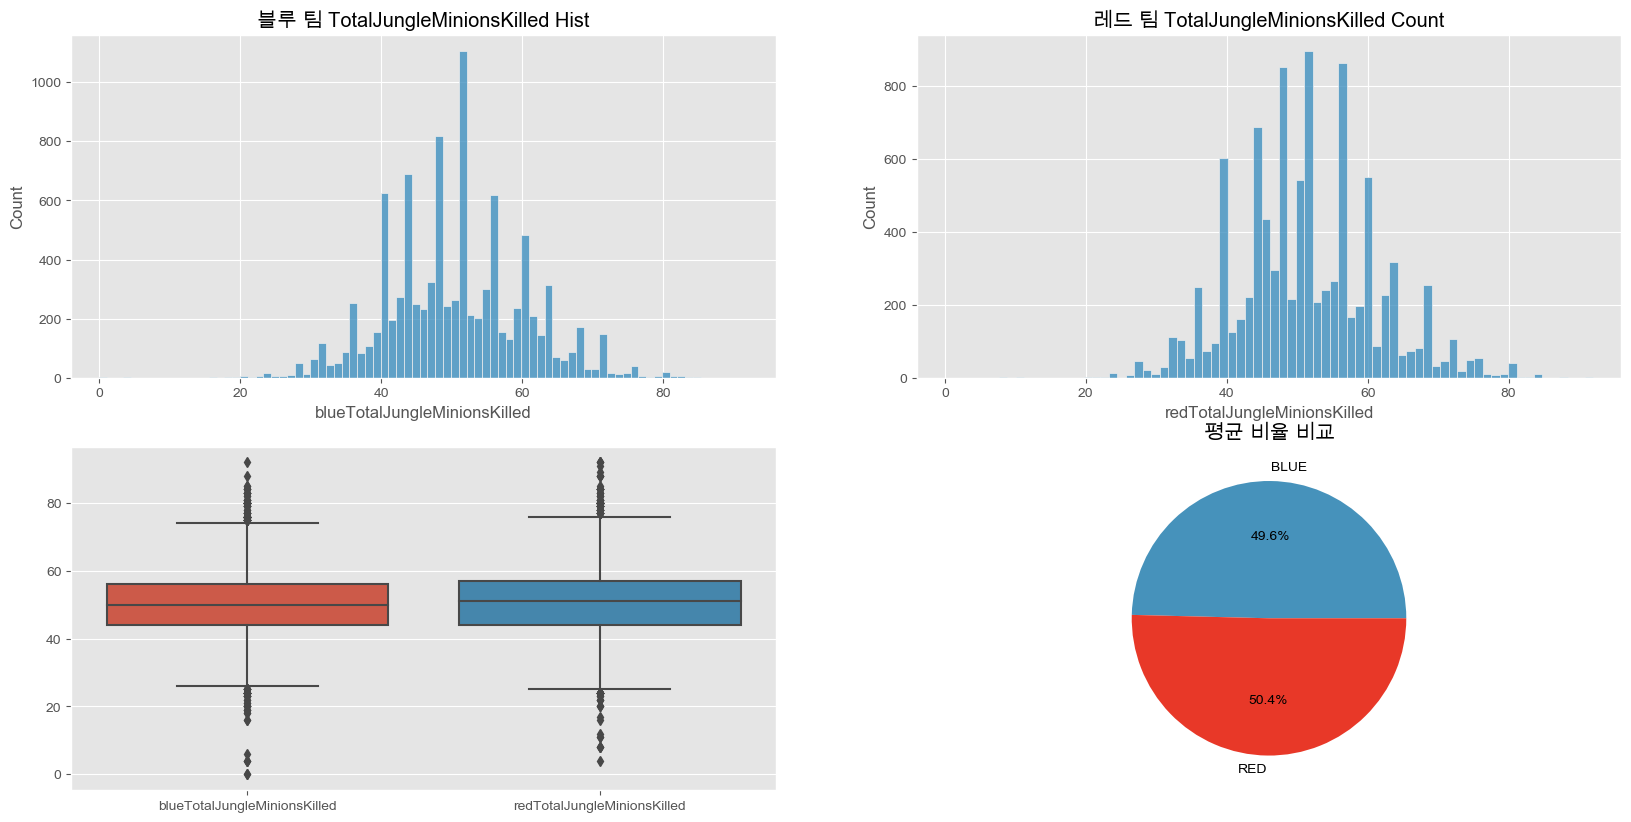

---------- Blue Team Describe ----------
blueTotalJungleMinionsKilled's Max : 92
blueTotalJungleMinionsKilled's Min : 0
blueTotalJungleMinionsKilled's Avg : 50.51
blueTotalJungleMinionsKilled's Median : 50.0

---------- Red Team Describe ----------
redTotalJungleMinionsKilled's Max : 92
redTotalJungleMinionsKilled's Min : 4
redTotalJungleMinionsKilled's Avg : 51.31
redTotalJungleMinionsKilled's Median : 51.0



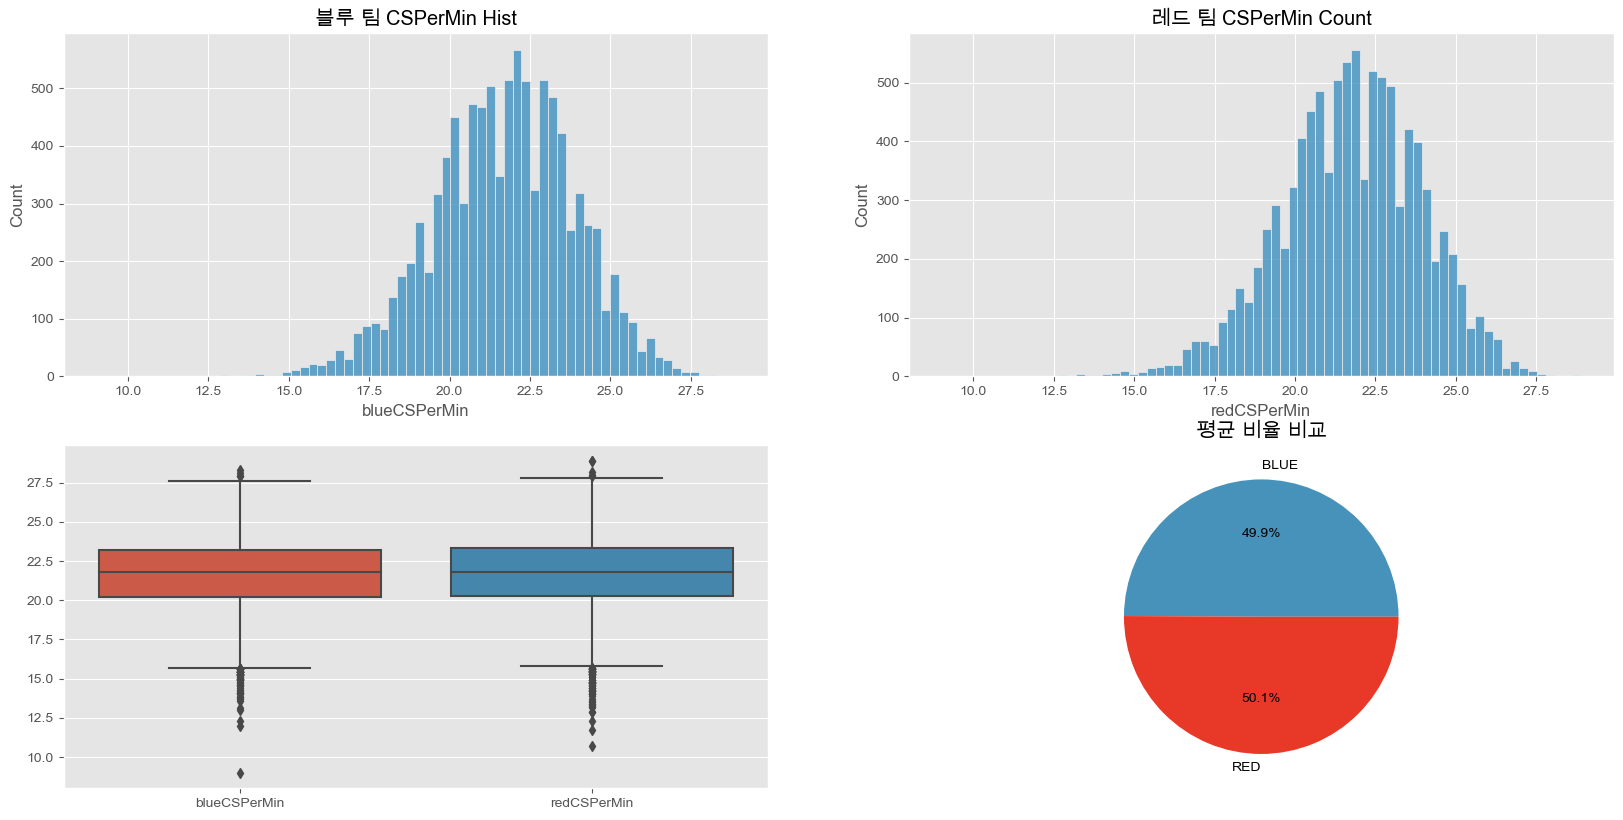

---------- Blue Team Describe ----------
blueCSPerMin's Max : 28.3
blueCSPerMin's Min : 9.0
blueCSPerMin's Avg : 21.67
blueCSPerMin's Median : 21.8

---------- Red Team Describe ----------
redCSPerMin's Max : 28.9
redCSPerMin's Min : 10.7
redCSPerMin's Avg : 21.73
redCSPerMin's Median : 21.8



********** KeyWord :  경험치 **********


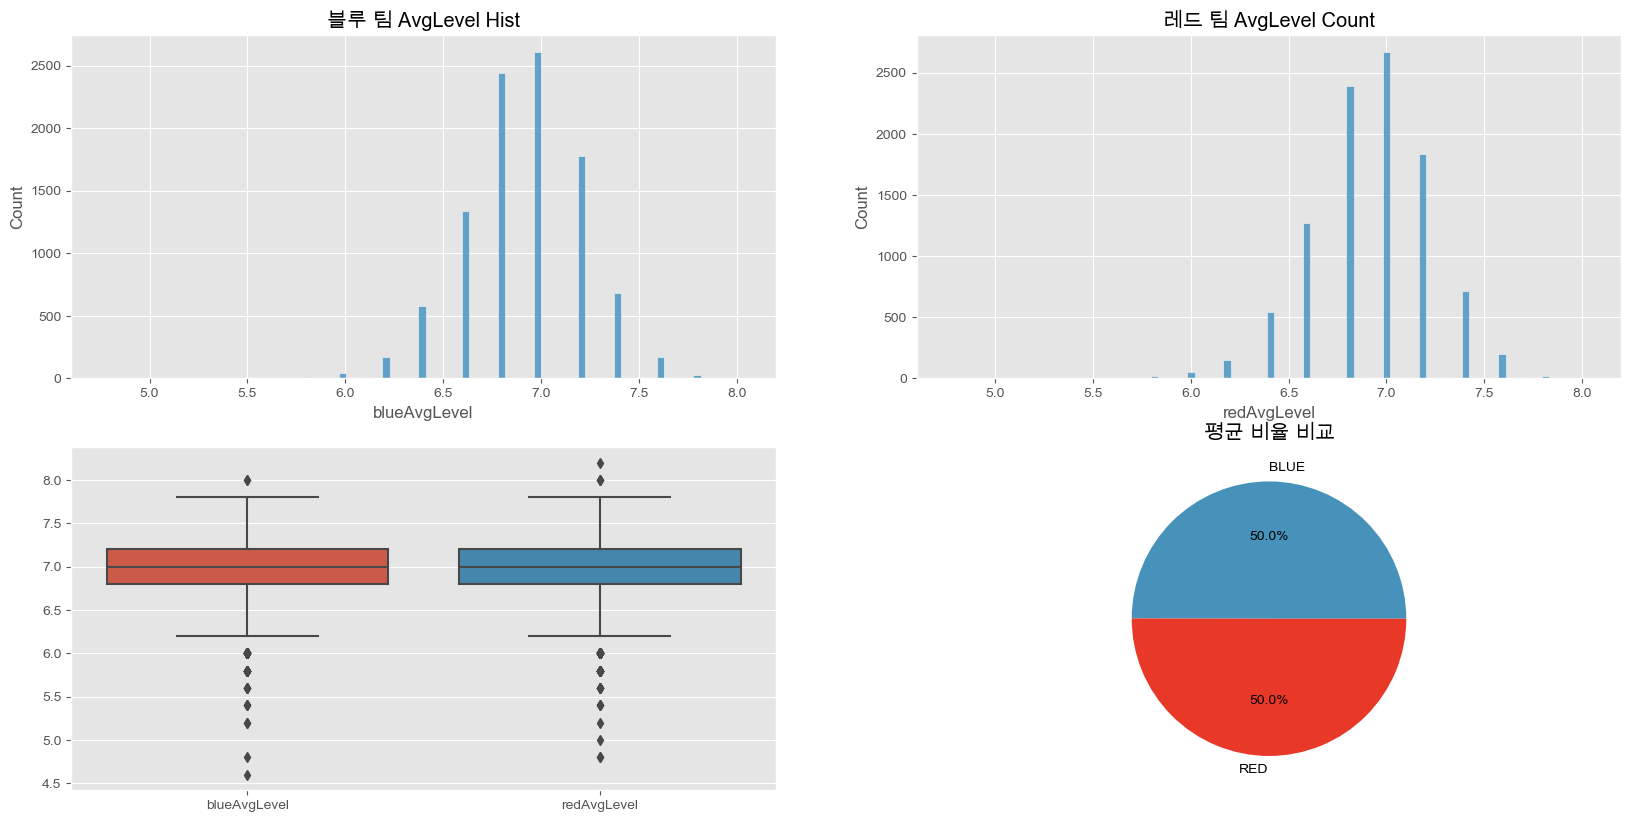

---------- Blue Team Describe ----------
blueAvgLevel's Max : 8.0
blueAvgLevel's Min : 4.6
blueAvgLevel's Avg : 6.92
blueAvgLevel's Median : 7.0

---------- Red Team Describe ----------
redAvgLevel's Max : 8.2
redAvgLevel's Min : 4.8
redAvgLevel's Avg : 6.93
redAvgLevel's Median : 7.0



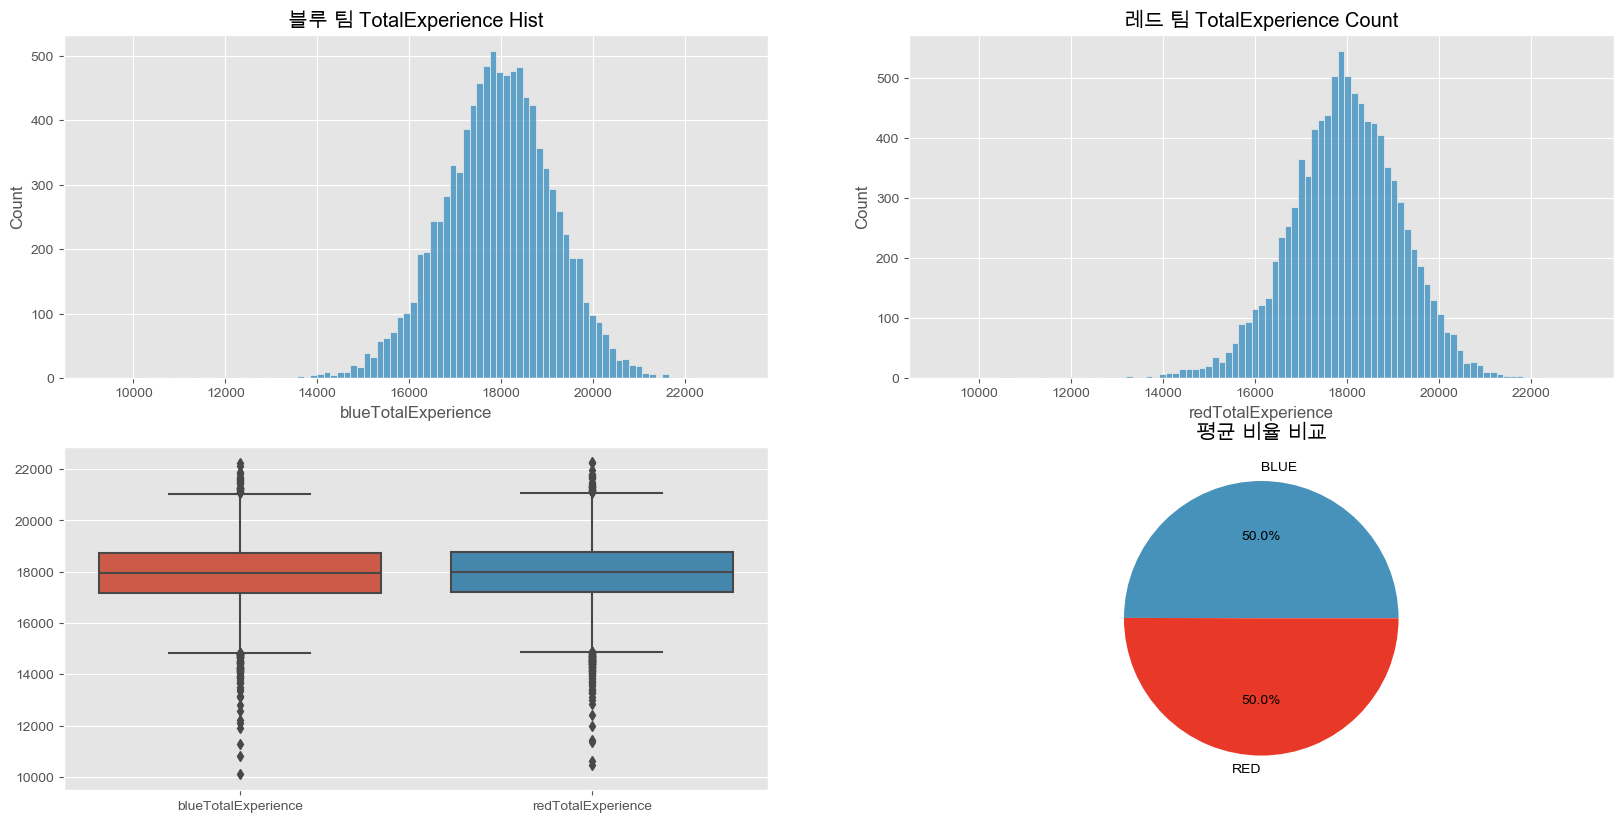

---------- Blue Team Describe ----------
blueTotalExperience's Max : 22224
blueTotalExperience's Min : 10098
blueTotalExperience's Avg : 17928.11
blueTotalExperience's Median : 17951.0

---------- Red Team Describe ----------
redTotalExperience's Max : 22269
redTotalExperience's Min : 10465
redTotalExperience's Avg : 17961.73
redTotalExperience's Median : 17974.0



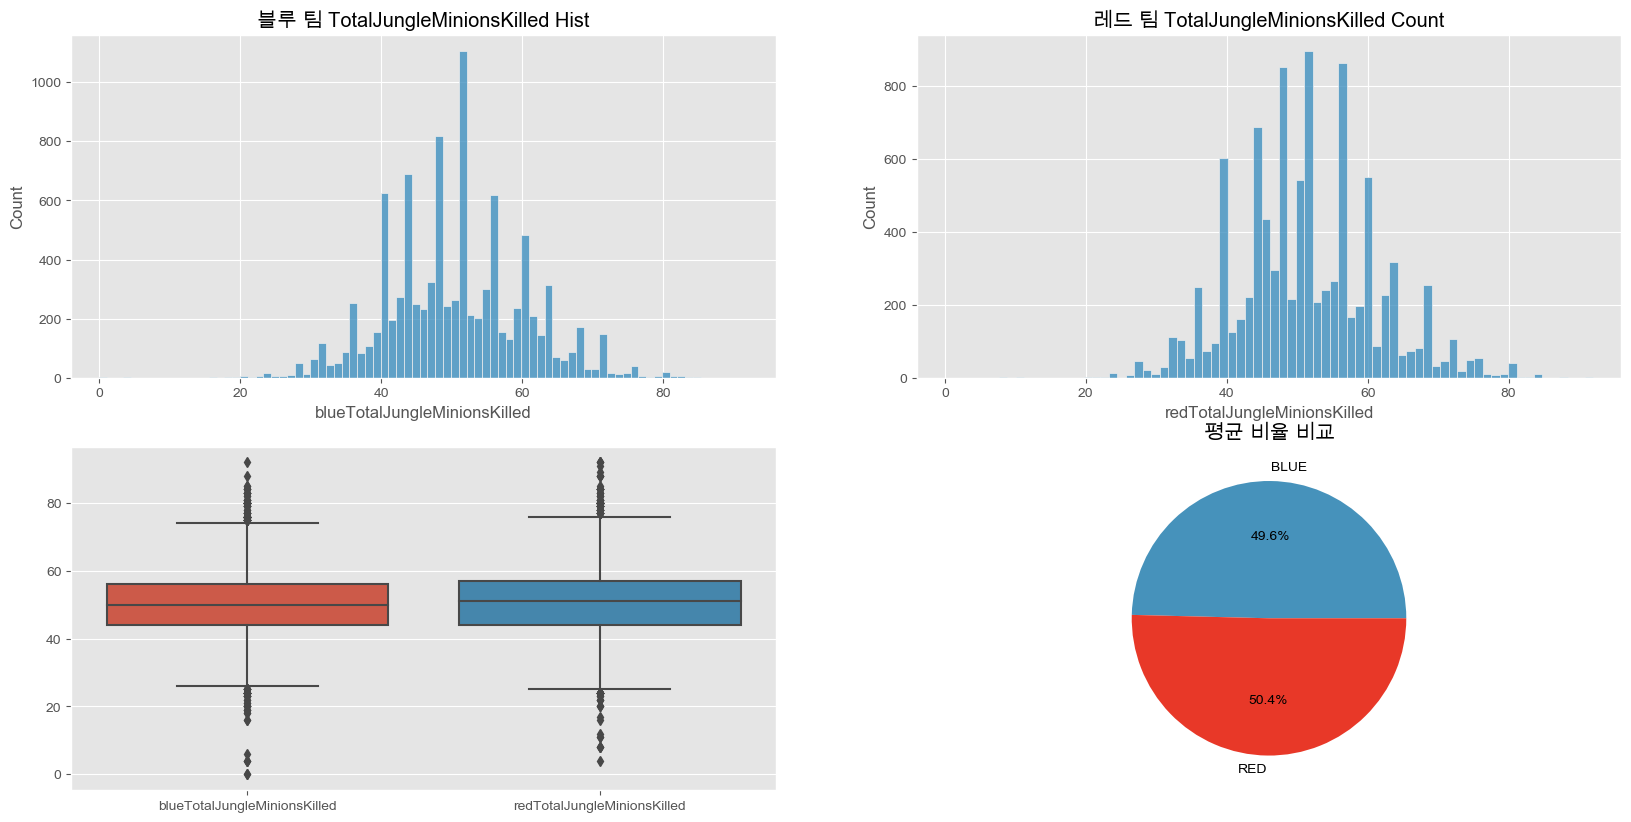

---------- Blue Team Describe ----------
blueTotalJungleMinionsKilled's Max : 92
blueTotalJungleMinionsKilled's Min : 0
blueTotalJungleMinionsKilled's Avg : 50.51
blueTotalJungleMinionsKilled's Median : 50.0

---------- Red Team Describe ----------
redTotalJungleMinionsKilled's Max : 92
redTotalJungleMinionsKilled's Min : 4
redTotalJungleMinionsKilled's Avg : 51.31
redTotalJungleMinionsKilled's Median : 51.0



********** KeyWord :  비교 **********


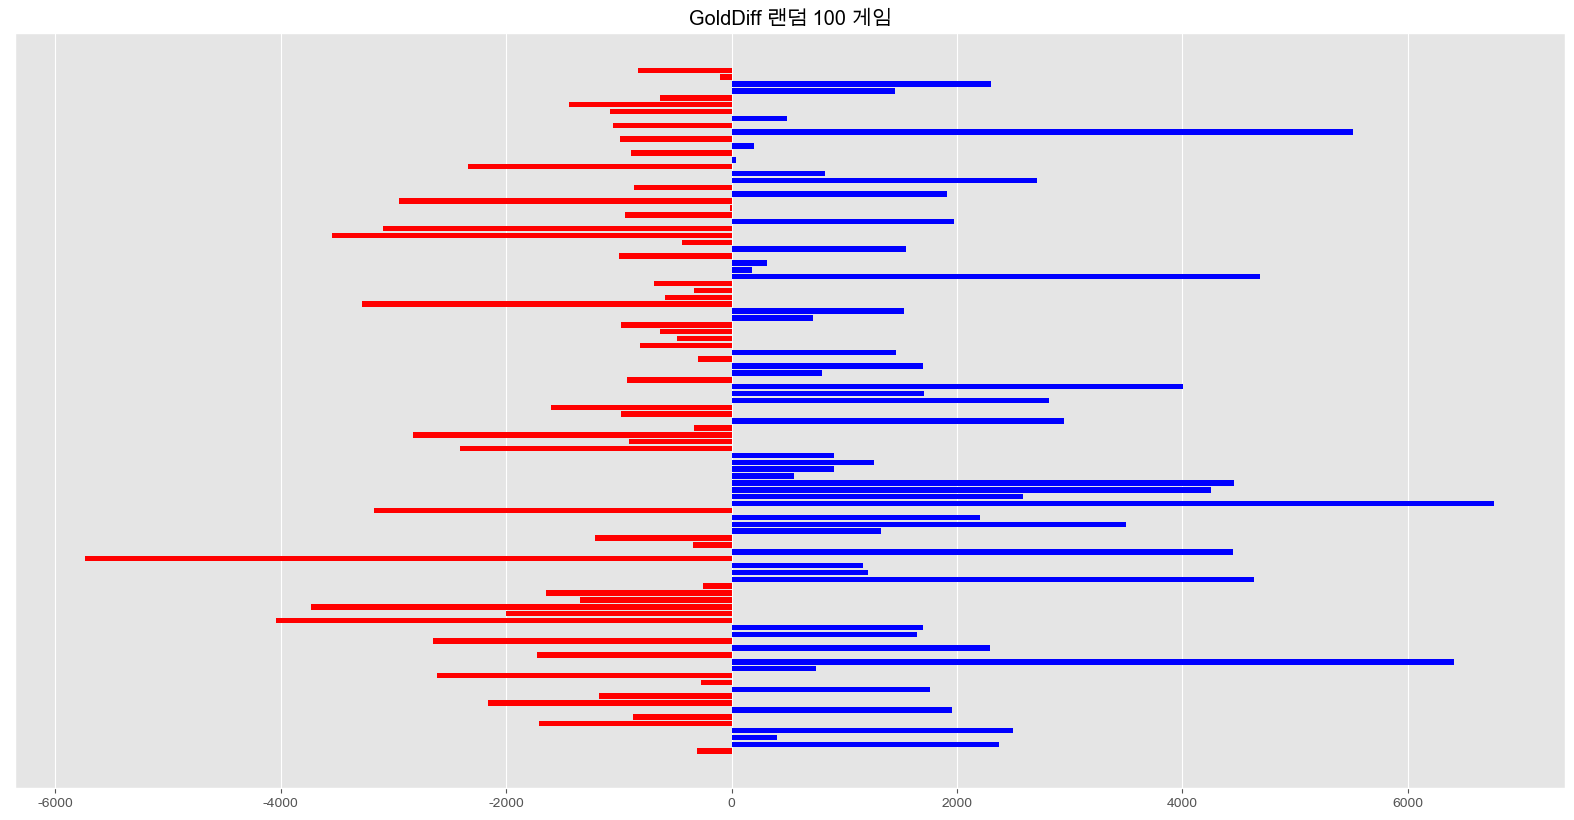

---------- GoldDiff  평균 지표 ----------
블루팀 약 14 우세




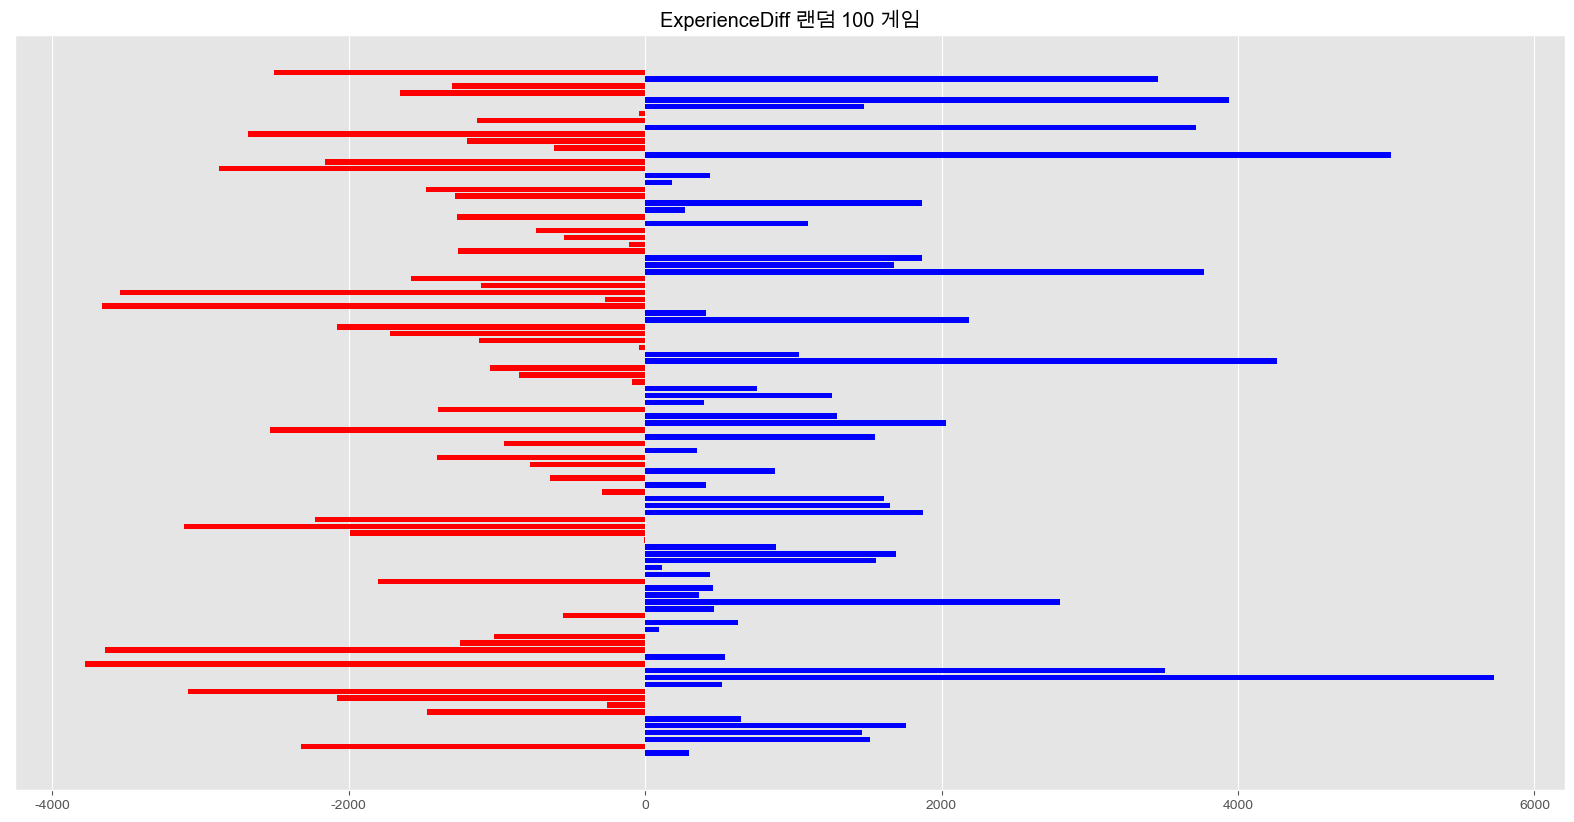

---------- ExperienceDiff  평균 지표 ----------
레드팀 약 34 우세






In [16]:
# 모든 데이터에 대한 시각화 진행, 원하는 주제에 대한 시각화는 직접 리스트 형태로 키워드 입력해주기
search_keyword = keyword_dict.keys()
# search_keyword = ['경험치']

for key in search_keyword:
    print("*" * 10, "KeyWord : ", key, "*"*10)
    for col in keyword_dict[key]:
        printHist(df, col)
    print()
    print()

```

데이터 시각화 후 분석

와드 
    설치
        - 와드 설치가 약 10~ 50개 사이에 대부분의 지표들이 분포. 
        - 이상치들이 상당히 많았는데 이 부분에 대해서 알아볼 필요가 있음
        - 평균 지표에서 두 팀의 차이는 크지 않았음.
    파괴
        - 파괴한 와드수는 0 ~ 10개 사이에 대부분의 지표들이 분포.
        - 이상치들이 존재했는데 설치와 연관되어 있는 부분이라 같이 살펴봐야 함. 단, 설치보다 수치가 비이상적으로 높지는 않았음
        - 레드팀이 약 2% 평균적으로 높았지만 절대적 수치로는 약 0.1개 차이로 유의미한 차이로 보기는 힘들어 보임.


KDA
    - 지표가 두 팀 모두 비슷한 수준으로 분포하고 있음을 보여줌.


오브젝트
    엘리트 몬스터(드래곤 + 전령)
        - 레드 팀이 2% 높은 평균 지표를 보여줌. 다른 지표와 다르게 레드와 블루의 모든 값이 0, 1, 2 3가지만 있다는 점에서 2%는 유의미한 수치로 바라볼 수 있음.

    드래곤
        - 레드 팀에서 확연하게 많이 처치했음을 알 수 있었음. 

    전령
        - 드래곤과 반대로 블루팀에서 높은 지표를 보여주었음. 이 부분을 통해서 알 수 있는 것은 아마도 리그 오브 레전드라는 게임에서 오브젝트 사냥에 있어서 블루팀은 드래곤, 레드팀은 전령을 처치하기 쉬운 구조로 설계되어 있을 것이라는 것을 추측해볼 수 있음.


타워
    - 타워 파괴하는 평균 비율은 유의미하게 블루팀이 높다는 지표가 나왔다.


골드
    - 총 골드와 분당 골드 획득량에 대한 분포는 블루, 레드 잘 잡혀있었다. 골드 획득에 영향을 주는 미니언을 잡은 수, 정글 몬스터 잡은 수에서는 정글 몬스터 사냥시 레드가 조금은 높은 지표를 보여주었지만 차이가 크지 않았다.


경험치
    - 경험치의 지표 역시 블루, 레드 균형 잡힌 지표를 보여주었다.


비교
    - 약 1만개의 게임의 골드와 경험치의 평균 차이에는 큰 차이가 없음을 알 수 있었다.

```

### 승패와 상관관계

In [15]:
df.corr().sort_values('blueWins', ascending=False)[['blueWins']][1:]

,blueWins
blueGoldDiff,0.511119
blueExperienceDiff,0.489558
blueTotalGold,0.417213
blueGoldPerMin,0.417213
blueTotalExperience,0.396141
blueAvgLevel,0.357820
blueKills,0.337358
redDeaths,0.337358
blueAssists,0.276685
blueCSPerMin,0.224909


- 10분이 진행된 게임에서 골드와 경험치에 대한 차이 지표가 승패를 결정짓는 가장 중요한 요인.
- 골드 획득에 큰 영향을 주는 킬에 대한 지표가 세부 골드 획득 루트중 가장 높은 상관을 보임.
- 와드 지표는 시각화를 통해서 확인했지만 설치 부분에서 비이상적으로 높은 이상치들이 존재해서 상관이 거의 없음으로 나타남.
- 오브젝트 중에서는 전령보다는 드래곤이 게임을 승리에 있어서 좀 더 좋은 상관을 가짐.
- 10분이 진행된 게임에서 파괴된 타워의 수는 승패와 큰 상관이 없는 것으로 나타남. 이부분은 의외였음.




### 데이터 전처리

EDA 과정 중에서 전처리가 필요하다고 생각된 데이터는 와드 설치와 파괴에 관한 데이터였음. 게임 내에서 불리는 트롤 유저가 있는 게임일 경우가 높다고 판단함.  
** 트롤(게임 승리에 방해되는 플레이)

In [16]:
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR

        print("{}'s Q1 : {}" .format(col, Q1))
        print("{}'s Q3 : {}".format(col, Q3))
        print("{}'s IQR : {}".format(col, IQR))
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index.to_list()

        if len(outlier_indices) == 0:
            outlier_indices = outlier_list_col
            continue
        
        tmp = []
        for c in outlier_list_col:
                if c in outlier_indices:
                    tmp.append(c)
        outlier_indices = tmp

    
    return outlier_indices

In [17]:
outliers_idx = detect_outliers(df, ["blueWardsPlaced", "redWardsPlaced"])
len(df.loc[outliers_idx])

blueWardsPlaced's Q1 : 14.0
blueWardsPlaced's Q3 : 20.0
blueWardsPlaced's IQR : 6.0
redWardsPlaced's Q1 : 14.0
redWardsPlaced's Q3 : 20.0
redWardsPlaced's IQR : 6.0


227

In [18]:
df.loc[outliers_idx]['blueWardsPlaced'].describe()

count    227.000000
mean      57.696035
std       30.769341
min       30.000000
25%       38.000000
50%       43.000000
75%       72.500000
max      221.000000
Name: blueWardsPlaced, dtype: float64

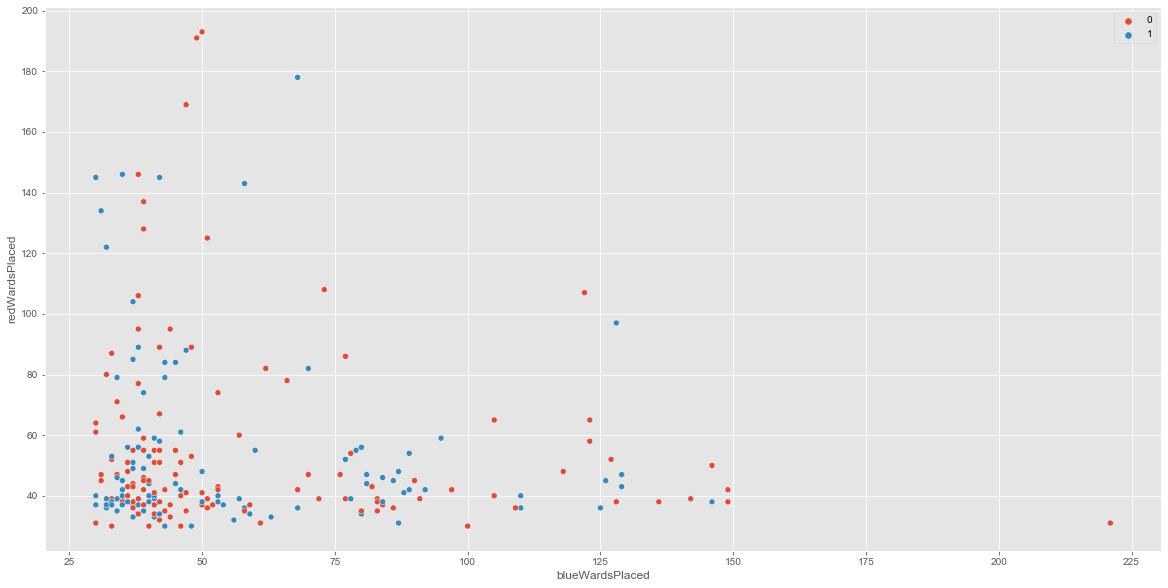

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df.loc[outliers_idx], x='blueWardsPlaced', y = 'redWardsPlaced', hue='blueWins')
plt.legend()
plt.show()

In [20]:
df.loc[outliers_idx]['blueWins'].value_counts()

0    120
1    107
Name: blueWins, dtype: int64

와드 설치 수가 이상치로 판별된 컬럼들의 승패는 약 50:50으로 영향을 크게 주고 있지 않다는 결과가 나왔음. 다만 이 이상치가 제대로 분류 됐다고 보기 힘들었음. 와드 설치의 지표들이 0~100 사이에 몰려있음을 시각화를 통해 확인했으므로 IQR이 아니라 절대적 지표로 100 기준으로 다시 살펴보기로 함.

In [21]:
expect_troll = df[(df['blueWardsPlaced']>100) | (df['redWardsPlaced']>100)]

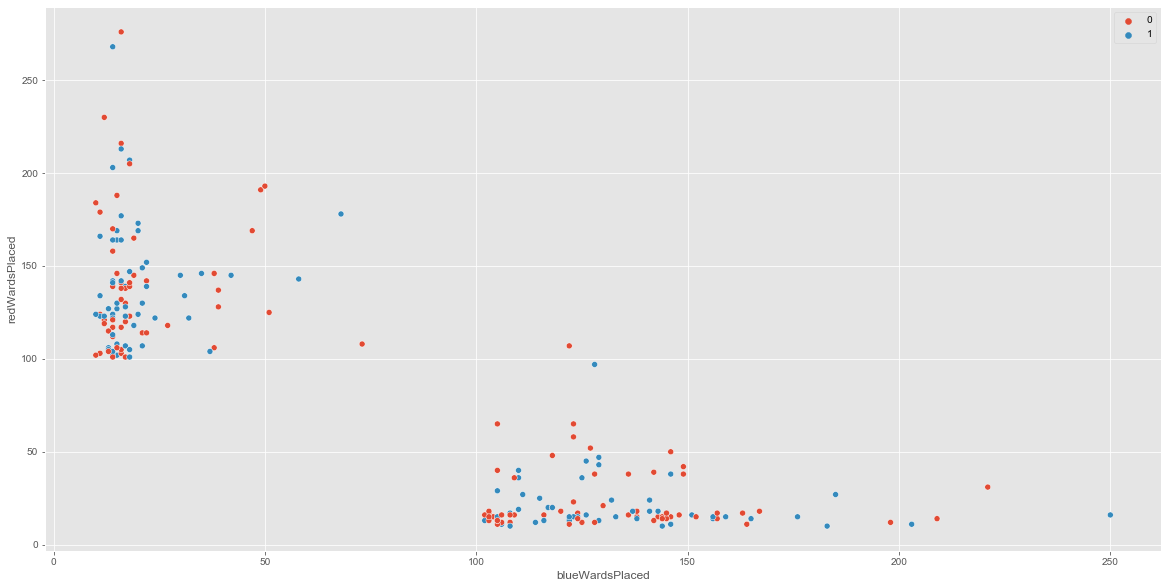

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=expect_troll, x='blueWardsPlaced', y = 'redWardsPlaced', hue='blueWins')
plt.legend()
plt.show()

이번 데이터셋에서 10분전 와드 설치 수는 승패 예측에 도움이 되기 힘들다는 결론을 내렸고 와드와 관련된 데이터는 사용하지 않기로 함.  
  
  또한 미니언 킬 수의 경우 경험치와 골드 관련 지표로 충분히 대체가 가능하다고 판단되어 미니언 킬 수는 사용하지 않음. 골드와 경험치 차이의 경우 제로썸 관계로 블루 하나의 지표만을 사용.  
    
정글 몬스터의 경우 사냥하지 않으면 경험치가 들어오지 않기 떄문에 사용하기로 함. 엘리트 몬스터 사냥의 경우 드래곤과 전령 합산 지표로 삭제하고 각각 사용.

KDA의 경우 K/D는 레드 블루 제로썸이지만 어시스트는 다르기 때문에 어시스트만 양쪽 지표 사용. K/D는 블루 지표만 사용. 퍼스트 블러드의 경우 한쪽 팀에서만 가능하기 때문에 블루 측 지표만 사용.

최종 사용할 컬럼들 : 'blueWins', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueTotalExperience', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redTotalExperience',
      'redTotalJungleMinionsKilled'
    
    


In [23]:
use_cols = ['blueWins', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueTotalExperience', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redTotalExperience',
      'redTotalJungleMinionsKilled']

df_clean = df[use_cols]

### 상관관계

In [24]:
df_clean.corr().sort_values('blueWins', ascending=False)[['blueWins']][1:]

,blueWins
blueGoldDiff,0.511119
blueExperienceDiff,0.489558
blueTotalGold,0.417213
blueTotalExperience,0.396141
blueKills,0.337358
blueAssists,0.276685
blueEliteMonsters,0.221944
blueDragons,0.213768
blueFirstBlood,0.201769
blueTotalJungleMinionsKilled,0.131445


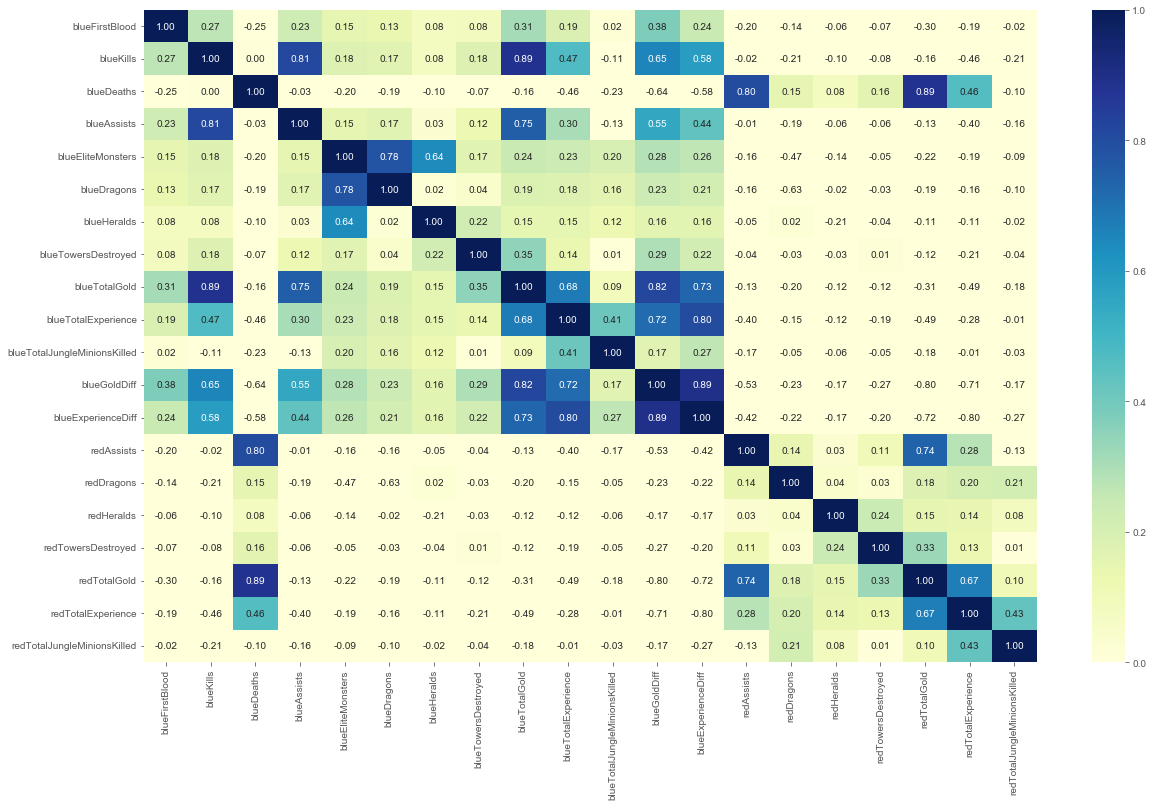

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0)
plt.show()

In [26]:
# 상관이 낮은 컬럼들 다시 삭제
del_col = ['blueTotalJungleMinionsKilled', 'blueTowersDestroyed', 'blueHeralds',
'redHeralds', 'redTowersDestroyed', 'redTotalJungleMinionsKilled']

In [27]:
df_clean = df_clean.drop(del_col, axis=1)

## 승패 예측 모델 만들기

In [28]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline

# # Train, Test 데이터 만들기
# X = df_clean.drop('blueWins', axis=1)
# y = df['blueWins']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

# 스케일러
mms = MinMaxScaler()
std = StandardScaler()
rob = RobustScaler()

scalers = [mms, std, rob]

pipe_tree = Pipeline([
    ('fit', DecisionTreeClassifier())
])

pipe_RDF = Pipeline([
    ('fit', RandomForestClassifier())
])

pipe_logistic = Pipeline([
    ('fit', LogisticRegression())
])

pipe_NB = Pipeline([
    ('fit', GaussianNB())
])

min_sample_split = [5,10,25,100]
max_depth = [5,10,15,20]

params_tree = [{
    'fit__max_depth' : max_depth,
    'fit__min_samples_split' : min_sample_split,
    'fit__splitter' : ['best', 'random']
}]

params_RDF = [{
    'fit__max_depth' : max_depth,
    'fit__max_features' : [0.2, 0.4, 0.5, 1.0],
    'fit__min_samples_leaf' : [0.2, 0.4, 0.5, 1.0],
    'fit__min_samples_split' : [0.5, 0.7 , 0.9]
}]

parmas_logistic = [{
    'fit__penalty' : ['l1', 'l2', 'elasticnet'],
    'fit__C' : [0.1, 0.25, 0.5, 1]
}]

params_NB = [{
}]

pipe = [
    pipe_tree, pipe_RDF, pipe_logistic, pipe_NB
]

params = [
    params_tree, params_RDF, parmas_logistic, params_NB
]

jobs = -1

scaler_dict = {
    0 : 'MMS',
    1 : 'STD',
    2 : 'ROB'
}

grid_dict = {
    0 : 'DecisionTree',
    1 : 'RandomForest',
    2 : 'Logistic',
    3 : 'GaussianNB',
    4 : 'QuadraticDiscriminantAnalysis'
}

model_accuracy_score = {}
model_f1_score = {}
model_best_params = {}

best_score_scaler = {}

for idx1, scaler in enumerate(scalers):
    scale_data = df_clean.drop('blueWins', axis=1)

    tmp = scaler.fit_transform(scale_data)

    scale_data = pd.DataFrame(tmp, index=scale_data.index, columns = scale_data.columns)

    X = scale_data
    # X = df_clean.drop('blueWins', axis=1)
    y = df_clean['blueWins']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

    isBest = 0
    best_list = []

    for idx2, (param, model) in enumerate(zip(params, pipe)):
        search = GridSearchCV(model, param,
                            cv = 5, n_jobs=jobs, verbose=-1)
        search.fit(X_train, y_train)
        y_pred = search.predict(X_test)

        model_ac = accuracy_score(y_test, y_pred)
        model_f1 = f1_score(y_test, y_pred)
        if isBest < model_ac:
            print('Best Model add or modify')
            best_list = [idx2, model_ac, model_f1, search.best_params_]
            isBest = model_ac
    
    model_accuracy_score[scaler_dict.get(idx1) + " " + grid_dict.get(best_list[0])] = best_list[1]
    model_f1_score[scaler_dict.get(idx1) + " " + grid_dict.get(best_list[0])] = best_list[2]
    model_best_params[scaler_dict.get(idx1) + " " + grid_dict.get(best_list[0])] = best_list[3]

print("finish")
print("*"*10, ' RESULT BEST Params ', "*"*10)
for key, value in model_best_params.items():
    print("{:10} : {}" .format(key, value))



Best Model add or modify
Best Model add or modify
Best Model add or modify
Best Model add or modify
Best Model add or modify
Best Model add or modify
Best Model add or modify
Best Model add or modify
finish
**********  RESULT BEST Params  **********
MMS Logistic : {'fit__C': 1, 'fit__penalty': 'l2'}
STD Logistic : {'fit__C': 1, 'fit__penalty': 'l2'}
ROB Logistic : {'fit__C': 1, 'fit__penalty': 'l2'}


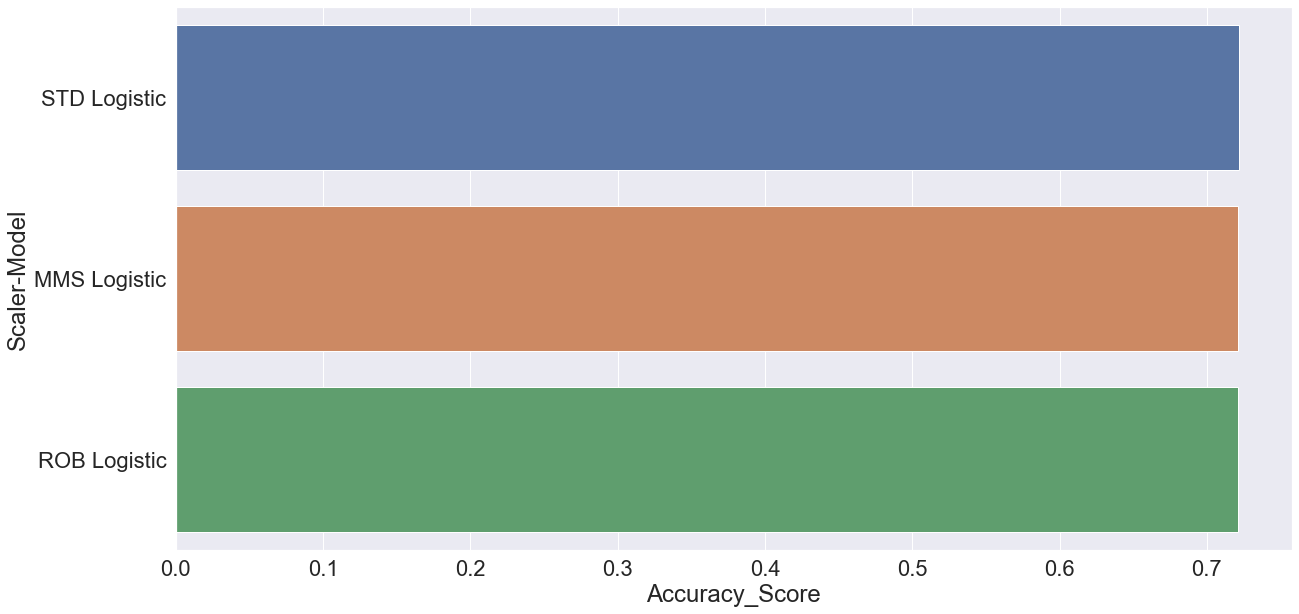

In [31]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_accuracy_score.keys() , model_accuracy_score.values()], index = ["Scaler-Model","Accuracy_Score"]).T
output.sort_values(["Accuracy_Score"], ascending= False ,inplace=True)
ax = sns.barplot(y="Scaler-Model", x="Accuracy_Score", data=output)
plt.show()

In [30]:
model_accuracy_score

{'MMS Logistic': 0.7211538461538461,
 'STD Logistic': 0.72165991902834,
 'ROB Logistic': 0.7211538461538461}

### 개선 여지 확인해보기

게임 10분 경과 후 데이터를 통해서 승/패 예측에 약 72% 정확성을 보여주었다. 전치리 과정에서 원본 데이터에서 피처를 줄이는 과정만 진행했었기 때문에 성능 개선을 위해서 10분 동안에 게임 내에서 트롤(팀이 지게 만드는 행위)유저를 판별 할 수 있는지 다시 한 번 데이터를 들여다 보기로 함.